## Import Libraries

In [1]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To preprocess the data for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# To build a logistic regression classifier
from sklearn.linear_model import LogisticRegression

# To build a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To create a pipeline for production
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    plot_confusion_matrix,
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

/Users/junglemac/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Import data

In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## The five point summary of all variables

In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,NaN,NaN,NaN,739177606.333663,36903783.450231,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0


### Checking the data types

In [5]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Checking for null and duplicate values

In [6]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

There are 1519 null values in the Education_Level variable and 749 null values in the Marital_Status

In [7]:
data.duplicated().sum()

0

There are no duplicated values in the dataset

## Checking the unique values in the categorical variables

In [8]:
#Observing the unique values in all the object columns
for i in data.columns:
    if data[i].dtype == 'O':
        print(f'The Unique values in {i} are:')
        print(data[i].value_counts(normalize=True))
        print('---------------------')

The Unique values in Attrition_Flag are:
Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64
---------------------
The Unique values in Gender are:
F    0.529081
M    0.470919
Name: Gender, dtype: float64
---------------------
The Unique values in Education_Level are:
Graduate         0.363383
High School      0.233852
Uneducated       0.172746
College          0.117681
Post-Graduate    0.059944
Doctorate        0.052393
Name: Education_Level, dtype: float64
---------------------
The Unique values in Marital_Status are:
Married     0.499787
Single      0.420452
Divorced    0.079761
Name: Marital_Status, dtype: float64
---------------------
The Unique values in Income_Category are:
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
abc               0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64
---------------------
The Unique values in Card_Category are:
Blue 

- Our target variable "Attrition Flag" shows imbalance between the classes 16% Attrited customers VS 83% are existing customers.
- All the unique values are ligit except for the "Income_Category" that includes a junk value 'abc' that requires amputation

## Exploratory Data Analysis and Insights
### Univariate analysis 
#### a. Visualizing the numerical data
From the 5 point summary, it is observed that **'CLIENTNUM','Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio'** are numerical and continous in nature.Yet, the 'Clientnum' is unique for all records,hence it does not have a predictibility power and shall be dropped. For the remaining numerical variables, we will define and apply a function to plot the **histogram & boxplot** for each variable

In [9]:
#we will define a function to plot the boxplot and histogram for all numerical variables
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
#creating a copy of the original dataset
df = data.copy()

In [11]:
#dropping the clientnum column
df.drop('CLIENTNUM', axis=1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
df.reset_index(drop=True)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [13]:
#extracting the list of numerical variables
numerical = list(df.select_dtypes(include=['int64','float64']).columns)
numerical

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

mean is 46.32596030413745 median is 46.0


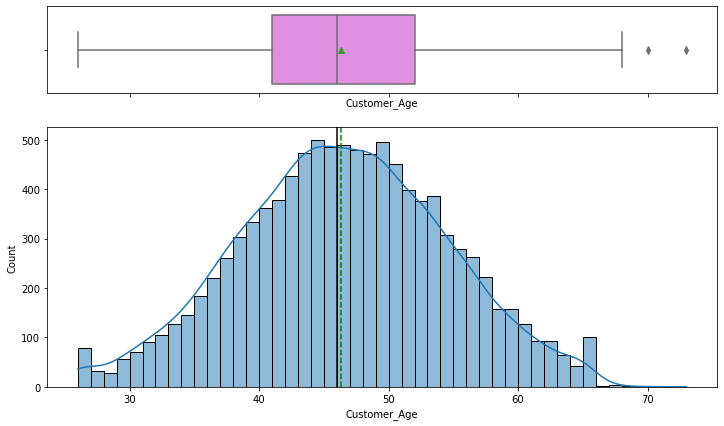

In [14]:
histogram_boxplot(df, 'Customer_Age', kde=True)
print('mean is' , df['Customer_Age'].mean(), 'median is',  df['Customer_Age'].median())

The customer age vairable is almost normally distributed with a mean very close to the median of approx. 46. There are few outliers at the age 70+ , yet they are realistic values and are consistent with the data.

The Months_on_book variable also seems normally distributed with very close mean and median valyes of approx 36 months. There are out liers at both skewers yet the min and max values of the variable seem consistent with the data at the minimum Months_on_book value is 13 months (1 year and 1 month) and the max is 56 months (approx. 4.6 years) which seems reasonable.

The Total_Relationship_Count shows the majority of customers hold 3 products. The distribution can be approximated to a slightly left skewed distribution with min value 1 and max value 6. There are no outliers observed.

mean is 2.3411671768539546 median is 2.0


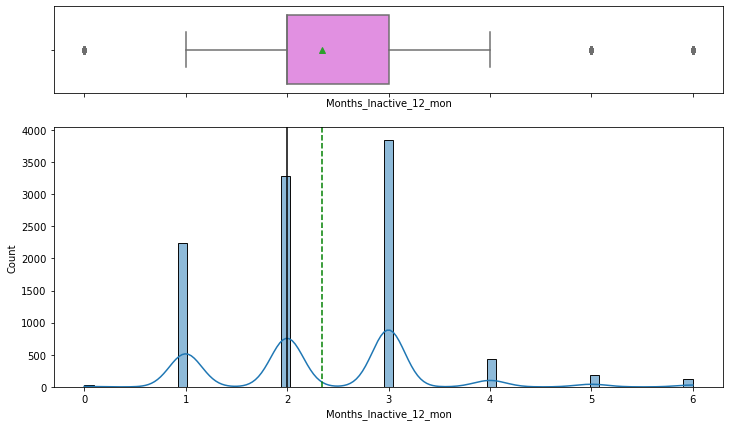

In [18]:
histogram_boxplot(df, 'Months_Inactive_12_mon', kde=True)
print('mean is' , df['Months_Inactive_12_mon'].mean(), 'median is',  df['Months_Inactive_12_mon'].median())

The Months_Inactive_12_mon shows a right skewed distribution with mean and median close in value approx 2 months. There are some outliers at 0 months and beyond 4 months, yet they are realistic values and are consistent with the data

mean is 2.4553174681544387 median is 2.0


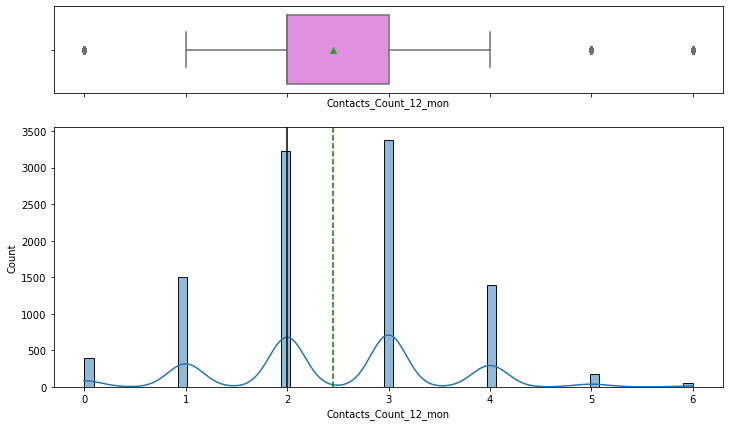

In [19]:
histogram_boxplot(df, 'Contacts_Count_12_mon', kde=True)
print('mean is' , df['Contacts_Count_12_mon'].mean(), 'median is',  df['Contacts_Count_12_mon'].median())

The Contacts_Count_12_mon variable shows a right skewed distribution with mean and median close in value approx 2 times of contact. There are some outliers at 0 times and beyond 4 times, yet they are realistic values and are consistent with the data

mean is 8631.953698034848 median is 4549.0


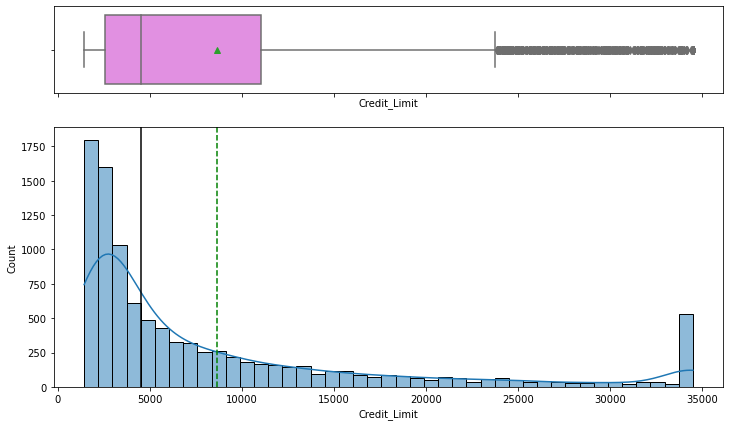

In [20]:
histogram_boxplot(df, 'Credit_Limit', kde=True)
print('mean is' , df['Credit_Limit'].mean(), 'median is',  df['Credit_Limit'].median())

The credit_limit variable shows a heavily right skewed distribution with mean of 8361 abd median of 4549. The box plot shows a high number of outliers beyond the 24,000 mark, yet the outliers seems consistent with the data distribution and realistic values as viewed from the real world.

mean is 1162.8140614199665 median is 1276.0


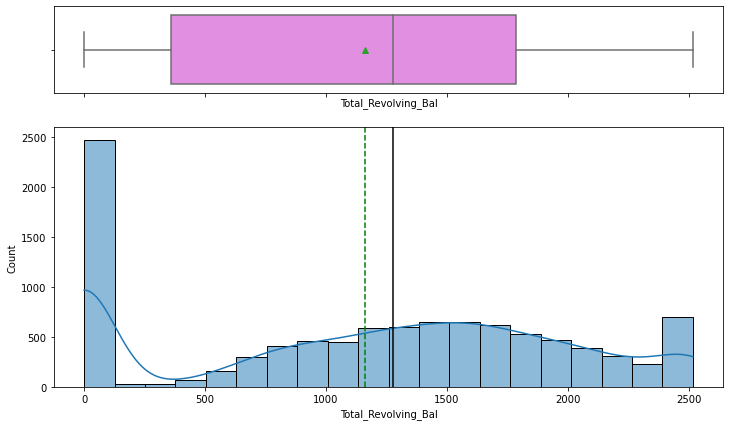

In [21]:
histogram_boxplot(df, 'Total_Revolving_Bal', kde=True)
print('mean is' , df['Total_Revolving_Bal'].mean(), 'median is',  df['Total_Revolving_Bal'].median())

Displaying the Total_Revolving_Bal after displaying the credit_limit variable proves the data records are ligit, as it is realistic for the customers with low credit_limits to have no total_revolving balance on their credit card compared to the customers with high credit limit who keeps a higher total_revolving balance. There are no outliers observed.

mean is 7469.139636614887 median is 3474.0


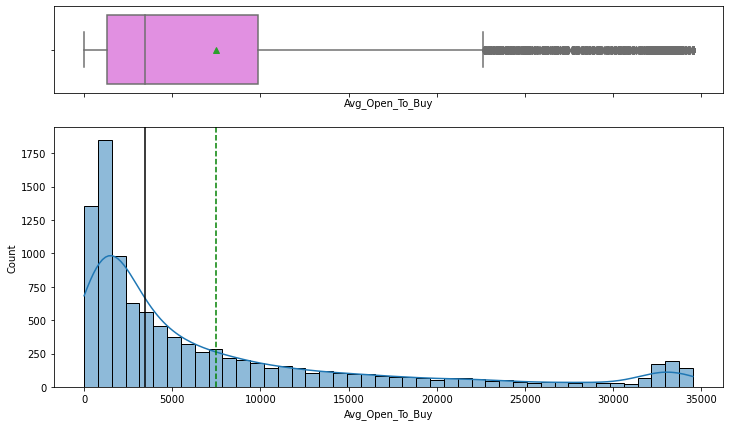

In [22]:
histogram_boxplot(df, 'Avg_Open_To_Buy', kde=True)
print('mean is' , df['Avg_Open_To_Buy'].mean(), 'median is',  df['Avg_Open_To_Buy'].median())

The Avg_Open_To_Buy variable is heavily right skewed with a mean of 7469 and median 3474. It also shows heaving concentration of outliers, yet they do seem consistent with the data. The distribution is also observed to be very close to the credit_limit variable distribution as realistically it makes good sense that those two variables are directly proportional. 

mean is 0.7599406536980376 median is 0.736


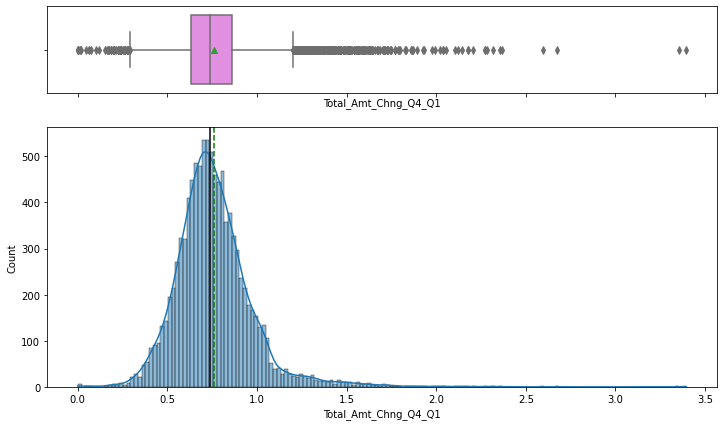

In [23]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1', kde=True)
print('mean is' , df['Total_Amt_Chng_Q4_Q1'].mean(), 'median is',  df['Total_Amt_Chng_Q4_Q1'].median())

The Total_Amt_Chng_Q4_Q1 variable shows a right skewed distribution with a high number of outlisers beyond the 1.2 mark. The mean and median are yet very close in value to approx 0.73 . The outliers seem ligit as there are many reasons why a customer spending can increase significantly through out the year for example: a job change with a high raise or the end of year bonus.

mean is 0.7122223758269962 median is 0.702


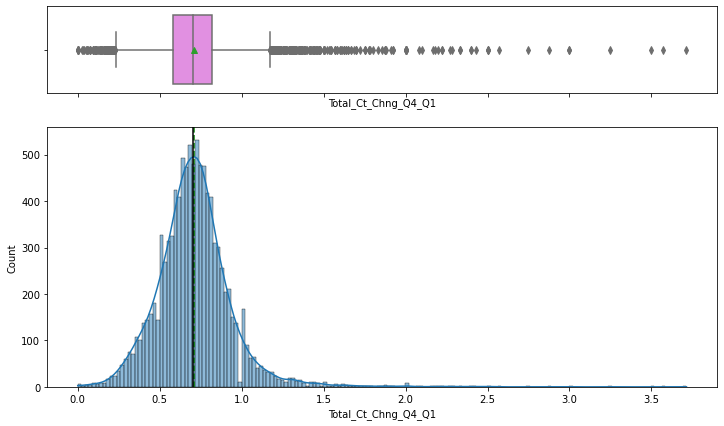

In [24]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1', kde=True)
print('mean is' , df['Total_Ct_Chng_Q4_Q1'].mean(), 'median is',  df['Total_Ct_Chng_Q4_Q1'].median())

As expected, the Total_Ct_Chng_Q4_Q1 variable is showing a similar distribution to the Total_Amt_Chng_Q4_Q1 which is a right skewed curve with many, yet ligit outliers.

mean is 4404.086303939963 median is 3899.0


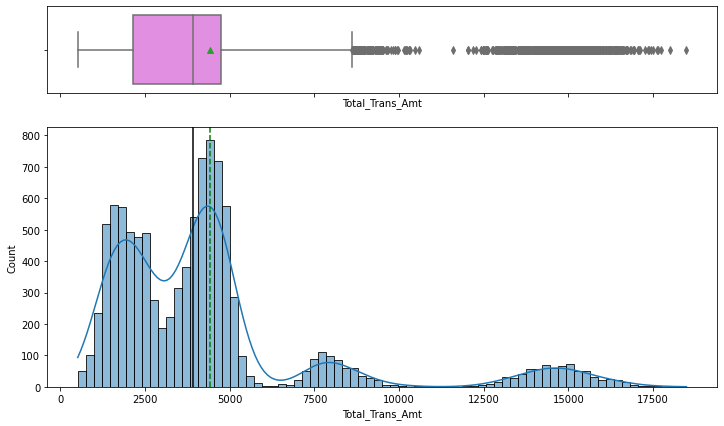

In [25]:
histogram_boxplot(df, 'Total_Trans_Amt', kde=True)
print('mean is' , df['Total_Trans_Amt'].mean(), 'median is',  df['Total_Trans_Amt'].median())

The Total_Trans_Amt variable distribution shows multiple Gausians, which reflects different expenditure of customers of different levels. There are 4 peaks viewed one at approx. 1250 avg, the second one at approx 4,000, the thrist one at approx 7,800 and the final one at approx. 15,000. The recommended action here is to split the data with respect to the gausians and derive a different model for each. 

mean is 64.85869457884863 median is 67.0


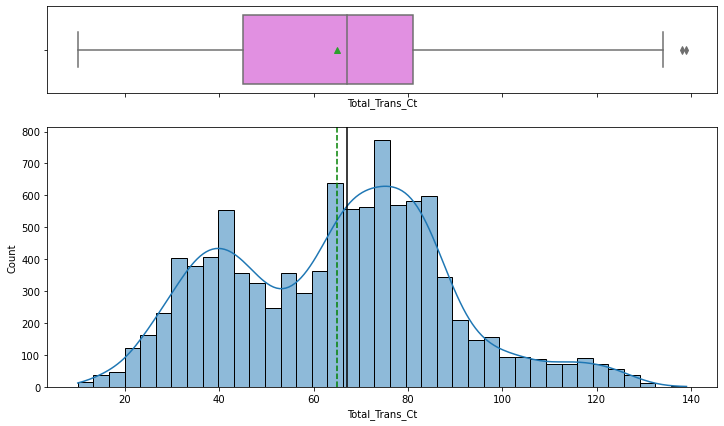

In [26]:
histogram_boxplot(df, 'Total_Trans_Ct', kde=True)
print('mean is' , df['Total_Trans_Ct'].mean(), 'median is',  df['Total_Trans_Ct'].median())

The Total_Trans_Ct variable shows a more normalized distribution compared to the total Total_Trans_Amt variable. It shows two peaks yet they are much smoother than the 4 peaks viewed in the Total_Trans_Amt variable. There are few outliers observed beying the 130 transactions mark, yet they do seem consistent with the data.

mean is 0.2748935518909845 median is 0.176


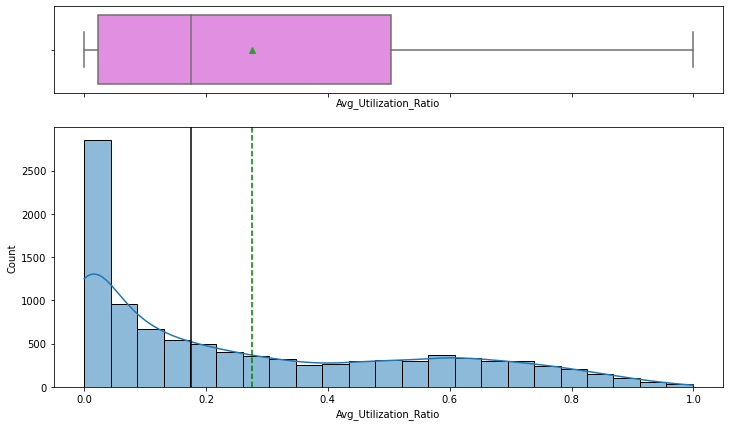

In [27]:
histogram_boxplot(df, 'Avg_Utilization_Ratio', kde=True)
print('mean is' , df['Avg_Utilization_Ratio'].mean(), 'median is',  df['Avg_Utilization_Ratio'].median())

The Average Avg_Utilization_Ratio variable distribution is heavily right skewed showing very high number of customers with 0 utilization rate and very few with 1 utilization rate. This is consistent with the decline observed by the bank of the credit card users. There are no outliers observed.

### a. Visualizing the categorical data

From the 5 point summary, it is observed that **'Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category'** are categorical in nature, hence we will define and apply a function to plot a **labelled barplot** for each variable

In [28]:
#displaying the categorical variables
categorical = list(df.select_dtypes(include=['O']).columns)
categorical

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

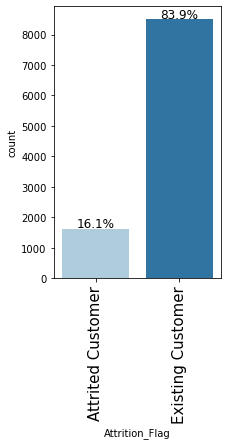

In [30]:
labeled_barplot(df, 'Attrition_Flag', perc=True)

The target variable shows 16.1% of the customers as Attrited and 83.9% as existing, which as mentioned earlier shows an imbalanace that has to be handled prior to the modelling

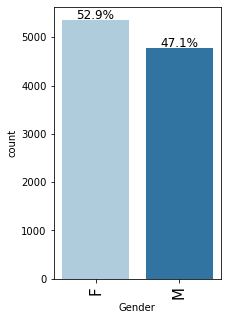

In [31]:
labeled_barplot(df, 'Gender', perc=True)

As per the five-point summary, the majority of bank clients are Females forming approx 53% of the client base and 47% of the clients are males.

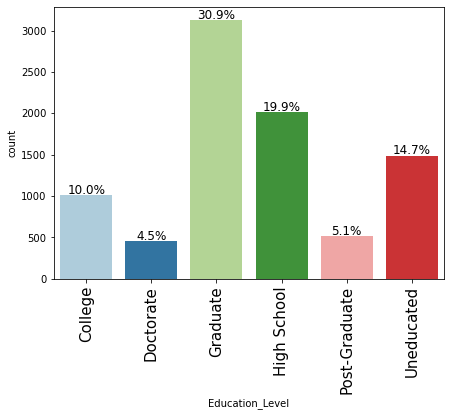

In [32]:
labeled_barplot(df, 'Education_Level', perc=True)

The majority of customers (30%) are graduates followed by approx 20% high school , followed by 15% uneducated, 10% college graduate, 5.1% post graduate and only 4.5% carry a Doctorate degree

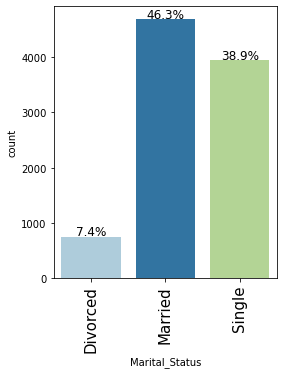

In [33]:
labeled_barplot(df, 'Marital_Status', perc=True)

The majority (46%) of customers are married, followed by 39% Single and 7.4% Divorced.

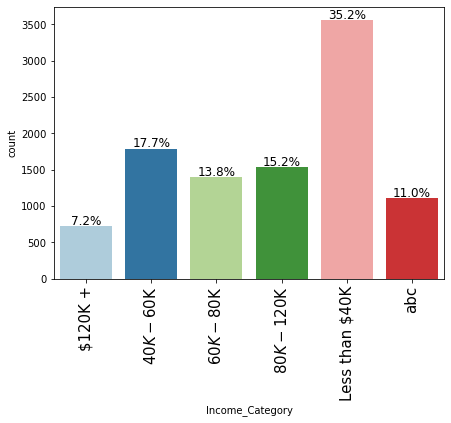

In [34]:
labeled_barplot(df, 'Income_Category', perc=True)

The majority of customers (35%) belong to the Income_category 'less than $40K) followed by 40K-60K, then 80K - 120K, then 60K-80k and finally only 7.2% belong to the 120K income_category. It is observed that 11% of the records belong to 'abc' category which represents a missing value that requires amputation

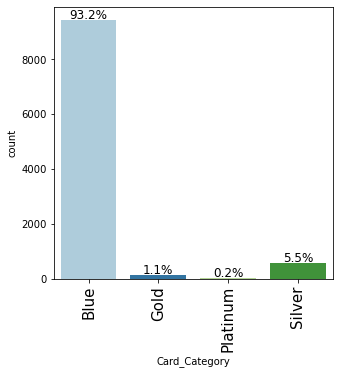

In [35]:
labeled_barplot(df, 'Card_Category', perc=True)

The majority of customers 93% carry the Blue card followed by 5.5% carrying the silver, 1.1% carrying the Gold and only 0.2% carrying the platinum card.

### Bivariate analysis 
After analysing the Categorical and Numerical variables separatly, let us explore how the variables are linked to each other. Hence, we will start by a heatmap followed by a pair plot.

In [36]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Creating a Heatmap

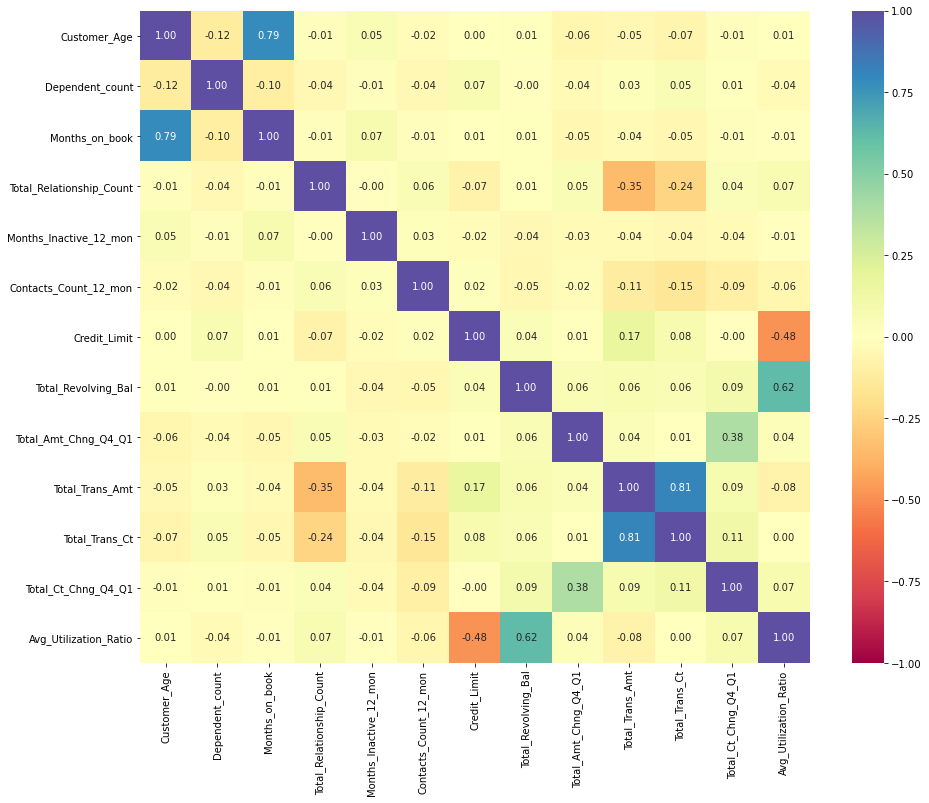

In [155]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt='0.2f', cmap="Spectral")
plt.show()

In [38]:
#derving the correlation table
df.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


- A very strong correlation is observed between the Credit_Limit and Avg_Open_To_Buy *(corr value = 0.995981)*
- Strong correlation observed between:
 - Customer_Age and Months_on_book which is reasonable as higher age customers would have been in relationship with the bank for longer *(corr value = 0.788912)*
 - Total_Trans_Amt and Total_Trans_Ct which was visible in the univariate analysis *(corr value = 0.807192)*
- A slight correlation observed between Total_Revolving_Bal and Avg_Utilization_Ratio *(corr value = 0.624022)*

## Exploring the relationship between Attrition_Flag and Numerical variables
We will start by deriving the medians (since most variables showed skeweness) of all numerical value columns in terms of Attrited and Existing customers

In [40]:
df.groupby(["Attrition_Flag"])[numerical].median()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,47.0,2.0,36.0,3.0,3.0,3.0,4178.0,0.0,3488.0,0.701,2329.0,43.0,0.531,0.000
Existing Customer,46.0,2.0,36.0,4.0,2.0,2.0,4643.5,1364.0,3469.5,0.743,4100.0,71.0,0.721,0.211


For easier interpretation of the relationships, we will plot the medians of all numerical variables with respect to  the Attrition_flag. Since there are 14 numerical variables with different mean values, we will divide the Numerical list into 3 groups: low values, Medium Values and High Values. We shall then plot for each group set a bar plot

In [41]:
#defining the 3 different numerical variable groups with respect to mean values
ratio_vals = ['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
numerical_low_vals = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

numerical_med_vals = ['Customer_Age','Months_on_book', 'Total_Trans_Ct']
numerical_high_vals = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt']

<Figure size 8640x4320 with 0 Axes>

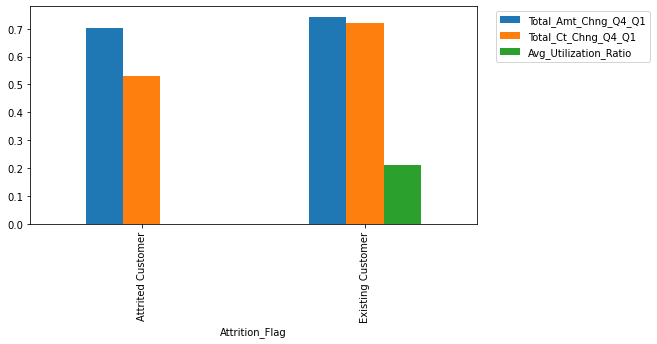

<Figure size 8640x4320 with 0 Axes>

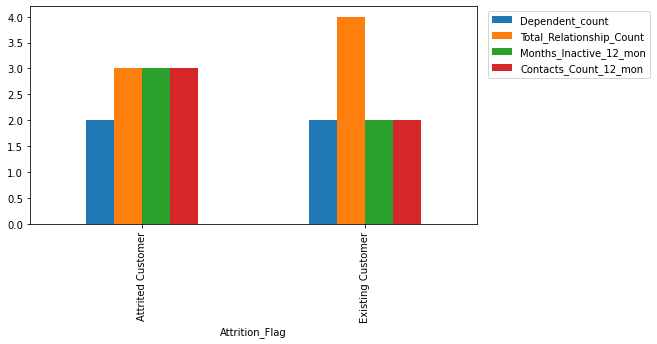

<Figure size 8640x4320 with 0 Axes>

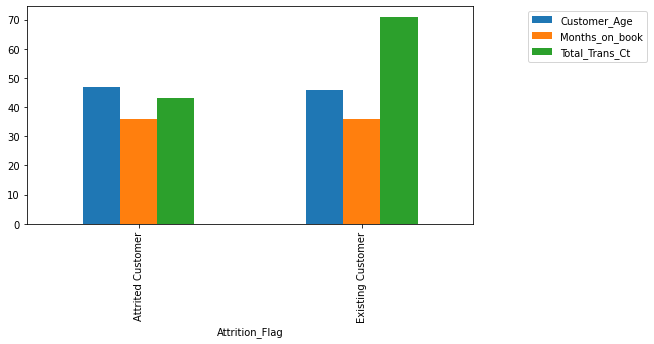

<Figure size 8640x4320 with 0 Axes>

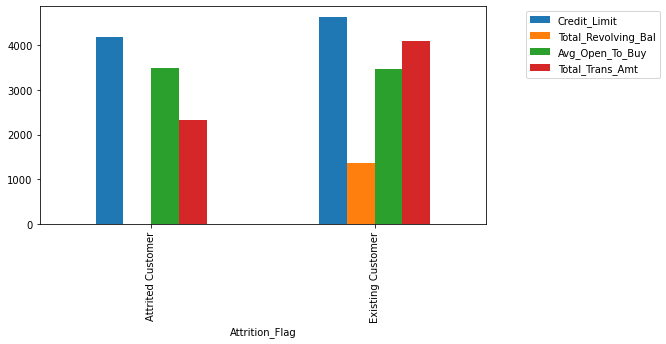

In [42]:
#plotting the numerical variable means with respect to the Attrition_flag
numeric_list = [ratio_vals,numerical_low_vals,numerical_med_vals,numerical_high_vals]
for i in numeric_list:
    plt.figure(figsize=(120,60))
    (df.groupby(["Attrition_Flag"])[i].median()).plot(kind="bar", figsize=(8, 4), stacked=False)
    plt.legend( bbox_to_anchor=(1.4, 1),loc="best")

**Observation**:
In the below table, we divide the predictors into 3 categories: Weak, Medium and Strong and describe how they vary between the existing and attrited customers. The final interpretation of the predictors strength will be identified at the modeling stage when we derive the importance of the features.

|Prediction Power|Predictor|Description
|---|----|---|
|Weak|Customer_Age|Almost no variation between existing and attrited customers|
|Weak|Dependent_count|Almost no variation between existing and attrited customers|
|Weak|Months_on_book|Almost no variation between existing and attrited customers|
|Weak|Avg_Open_To_Buy|Almost no variation between existing and attrited customers|
|Weak|credit_limit|Almost no variation between existing and attrited customers|
|Weak|Total_Amt_Chng_Q4_Q1|Almost no variation between existing and attrited customers|
|||
|Medium|Total_Relationship_Count|Lower count observed for attrited customers|
|Medium|Contacts_Count_12_mon|Higher count observed for attrited customers|
|Medium|Months_Inactive_12_mon|Higher count observed for attrited customers|
|||
|Strong|Total_Revolving_Bal|Much lower value observed for attrited customers|
|Strong|Total_Trans_Amt|Almost lower by half for attrited customers|
|Strong|Total_Trans_Ct|Almost lower by half for attrited customers|
|Strong|Total_Ct_Chng_Q4_Q1|Almost lower by 20% for attrited customers|
|Strong|Avg_Utilization_Ratio|Almost lower by 20% for attrited customers|


## Exploring the relationship between Attrition_Flag and Categorical variables


Since the categorical variables are much less than the numerical variables, the relationship bar plot will be plotted for each variable separately.

In [43]:
categorical

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [44]:
df[df['Attrition_Flag'] == 'Attrited Customer']['Income_Category'].value_counts(normalize=True)

Less than $40K    0.376152
$40K - $60K       0.166564
$80K - $120K      0.148740
$60K - $80K       0.116165
abc               0.114935
$120K +           0.077443
Name: Income_Category, dtype: float64

**Observation**:
- Weak predictors: Gender and Marital_Status
- Medium Strength Predictors: **Education_Level** where the highest ratio of Attired customers are Doctorates and belong to the **Income_Category** less than $40K 
- Strong Predictors: **Card_Category** where the highest ratio of Attired customers is within the Platinum card holders.

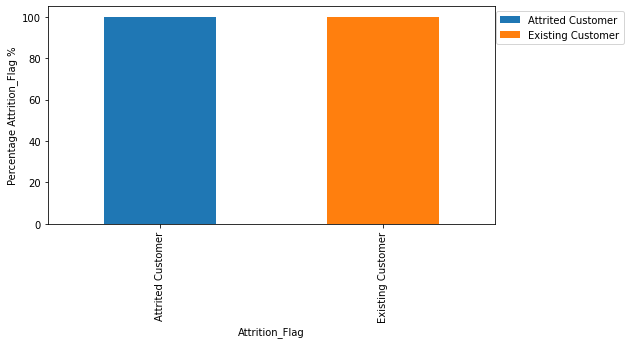

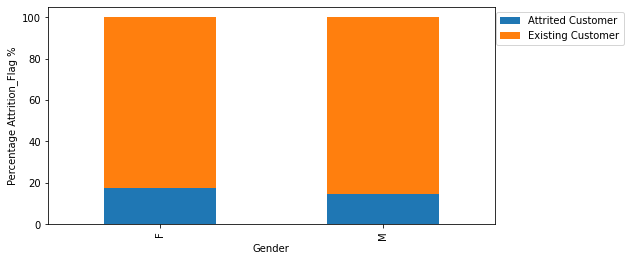

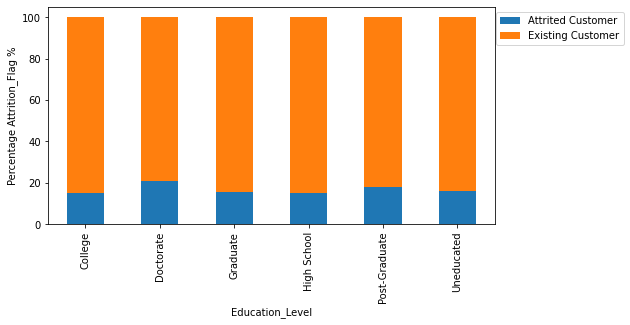

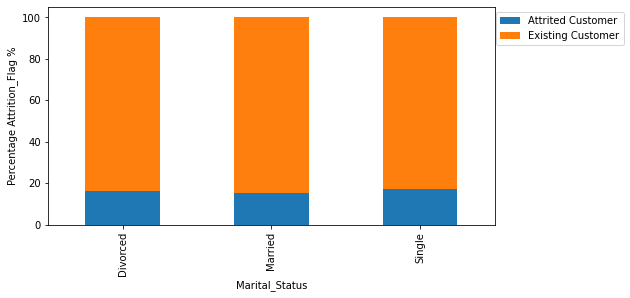

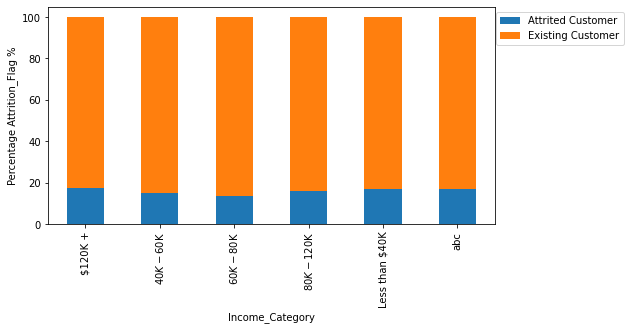

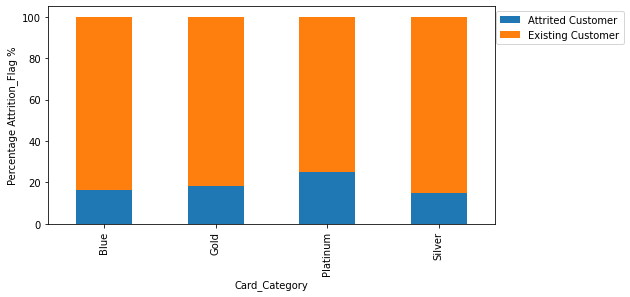

In [45]:
for i in categorical:
    if i != "Attrited Customer":
        (pd.crosstab(data[i], data["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar", figsize=(8, 4), stacked=True
        )
        plt.ylabel("Percentage Attrition_Flag %")
        plt.legend( bbox_to_anchor=(1.3, 1),loc="upper right")

### Key meaningful observations on individual variables,  relationship between variables and pre-processing required

- The Univarate Analysis shows the below common characteristics among customers:
    - 16.1% of the customers as Attrited and 83.9% as existing
    - 53% of the client base are females
    - 93% carry the Blue card
    - 35% belong to the Income_category less than USD 40K
    - 46% of customers are married
    - 30% are graduates 
- The Bivariate Analysis showed:
    - The **Credit_Limit and Avg_Open_To_Buy** variables are very strongy correlated
    - The **Total_Trans_Amt and Total_Trans_Ct** variables are strongly correlated
- The Strong Predictors and their Relation ship between variables and target variable are:
    - Attrited customers have less **Total_Revolving_Bal,Total_Trans_Ct,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio** than Existing customers
    - **Card_Category** shows The highest ratio of Attrited customers as Platinum card holders.
- The preprocessing required:
    - Removing the colinearity: 'Avg_Open_To_Buy' variable shall be dropped
    - Null values amputation for the columns: Education_Level and Marital_Status
    - Missing values amputation in the "Income_category" variable


## Data pre-processing
### Prepare the data for analysis
#### 1- Treating the colinearity

In [46]:
#dropping the Avg_Open_To_Buy variable
df.drop('Avg_Open_To_Buy', axis=1, inplace=True)

In [47]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


#### 2- Splitting the data into Train, Validation and Test

In [48]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [49]:
# first spliting the data into 2 parts, temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y )

# second spliting the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y )

print(X_train.shape, X_val.shape, X_test.shape)

(7595, 18) (2532, 18) (2026, 18)


#### 3- Missing value Treatment 
The adopted approach is applying the KNN Imputer. Hence, the steps followed are:
1. Mapping the missing value columns as they are all categorical 
2. Apply the KNN Imputer
3. Apply inverse mapping

In [50]:
X['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

In [51]:
X.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [52]:
#converting the 'abc' value in the 'Income_Category' to null value
X_train['Income_Category'] = X_train['Income_Category'].replace('abc', np.NaN)
X_val['Income_Category'] = X_val['Income_Category'].replace('abc', np.NaN)
X_test['Income_Category'] = X_test['Income_Category'].replace('abc', np.NaN)


In [53]:
#create the mapping values
education = {'Graduate':1,'High School':2, 'Uneducated':3, 'College':4,'Post-Graduate':516, 'Doctorate':451}
income = {'Less than $40K':1, '$40K - $60K':2, '$80K - $120K':3, '$60K - $80K':4, '$120K +':5}
marital = {'Married':1,'Single':2, 'Divorced':3}
card = {'Blue':1, 'Silver':2, 'Gold':3, 'Platinum': 4}
gender = {'F':1, 'M':2}

#create a list of the mapping dictionaries to apply the mapping in a for loop
mapping_list=[gender,education,marital,income,card]
categorical = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

#create the mapping for loop
for i in np.arange(0,5):
    X_train[categorical[i]]=X_train[categorical[i]].map(mapping_list[i])
    X_val[categorical[i]]=X_val[categorical[i]].map(mapping_list[i])
    X_test[categorical[i]]=X_test[categorical[i]].map(mapping_list[i])


In [54]:
imputer = KNNImputer(n_neighbors=5)

In [55]:
#checking if the mapping was successful on the X_trains set as a sample
X_train.sample(10)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5729,49,1,0,516.0,1.0,1.0,1,36,6,3,3,3007.0,2517,0.853,4423,67,0.675,0.837
6050,45,1,4,1.0,2.0,2.0,1,34,3,2,2,2700.0,1977,0.801,4984,75,1.083,0.732
2522,35,2,2,1.0,2.0,5.0,1,27,6,2,2,13655.0,1048,0.509,2383,59,0.595,0.077
7539,47,1,3,1.0,3.0,1.0,1,36,3,3,2,2182.0,1566,0.574,3935,77,0.711,0.718
9147,40,2,3,NaN,2.0,4.0,1,34,2,2,1,9594.0,2517,0.945,14213,100,0.786,0.262
7325,47,1,5,3.0,NaN,NaN,1,34,4,1,3,3127.0,2094,0.709,4518,86,0.830,0.670
7125,40,2,2,1.0,1.0,5.0,1,33,6,4,1,14713.0,905,0.817,4125,82,0.822,0.062
3682,35,2,0,4.0,2.0,3.0,2,16,6,3,3,34516.0,0,0.524,2655,64,0.829,0.000
9304,53,2,1,1.0,2.0,3.0,1,47,1,1,2,34516.0,1583,0.631,12906,100,0.639,0.046
7596,43,1,3,NaN,1.0,1.0,1,35,5,3,2,1721.0,729,0.902,4853,74,0.644,0.424


In [56]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the validation data 
X_val=pd.DataFrame(imputer.transform(X_val),columns=X_val.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [57]:
#confirming that the imputation was successful and no more null values are present in the dataset
print(X_train.isnull().sum())
print(X_val.isnull().sum())
print(X_test.isnull().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt            

All missing values have been treated and Moving on to the inverse mapping.

In [58]:
## creating a function to inverse the encoding
def inverse_map(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [59]:
mapping_list=[gender,education,marital,income,card]
categorical = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

#create the mapping for loop
for i in np.arange(0,5):
    inverse_map(mapping_list[i],categorical[i])


In [60]:
#confirming the inverse mapping has been succesful on a sample of the test data
X_test.sample(10)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1190,54.0,M,1.0,College,Single,$120K +,Blue,48.0,1.0,3.0,1.0,2456.0,1654.0,0.565,4468.0,84.0,0.750,0.673
542,54.0,M,2.0,Graduate,Single,$120K +,Blue,36.0,5.0,1.0,2.0,19865.0,0.0,0.590,4350.0,83.0,0.766,0.000
708,55.0,F,2.0,Uneducated,Married,$40K - $60K,Blue,35.0,3.0,3.0,0.0,3025.0,2376.0,1.252,1277.0,23.0,1.875,0.785
1584,36.0,F,1.0,High School,Single,Less than $40K,Blue,26.0,3.0,3.0,2.0,2517.0,0.0,0.946,3569.0,62.0,0.771,0.000
643,58.0,F,2.0,Graduate,Married,Less than $40K,Blue,44.0,4.0,2.0,3.0,5031.0,1327.0,0.553,1433.0,34.0,0.889,0.264
1968,54.0,F,3.0,Uneducated,Single,Less than $40K,Blue,49.0,2.0,2.0,2.0,1719.0,0.0,0.579,4869.0,65.0,0.512,0.000
419,50.0,F,3.0,Graduate,Divorced,$60K - $80K,Silver,45.0,2.0,1.0,2.0,34516.0,2381.0,0.748,15071.0,103.0,0.717,0.069
1213,48.0,M,4.0,High School,Single,$60K - $80K,Blue,30.0,3.0,3.0,2.0,14670.0,1900.0,0.806,4221.0,83.0,0.766,0.130
1798,35.0,M,1.0,Graduate,Married,$40K - $60K,Blue,25.0,5.0,4.0,4.0,5801.0,1176.0,1.120,2987.0,52.0,0.857,0.203
295,39.0,F,3.0,Uneducated,Single,$40K - $60K,Blue,27.0,6.0,2.0,1.0,5363.0,0.0,0.670,4121.0,78.0,0.625,0.000


### 4.Encoding categorical variables

In [61]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_val=pd.get_dummies(X_val,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(7595, 28) (2532, 28) (2026, 28)


After the one-hot-encoding the predictors data frames consists of 28 columns instead of 18

In [62]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,46.0,4.0,42.0,4.0,0.0,3.0,13376.0,1633.0,0.980,4515.0,63.0,1.172,0.122,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,45.0,2.0,36.0,3.0,4.0,3.0,2918.0,1597.0,0.884,4454.0,76.0,0.900,0.547,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,48.0,4.0,43.0,4.0,2.0,2.0,1438.3,0.0,0.722,2520.0,45.0,0.452,0.000,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,56.0,3.0,46.0,4.0,3.0,2.0,2258.0,0.0,0.617,4803.0,72.0,0.714,0.000,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,55.0,2.0,36.0,5.0,1.0,4.0,1994.0,1175.0,0.794,4455.0,82.0,0.547,0.589,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


#### 5. Converting the target variables into two classes 0 and 1
- 0:Existing customer
- 1:Attrited Customer

In [63]:
y_train = y_train.replace(['Existing Customer','Attrited Customer'],[0,1])
y_val = y_val.replace(['Existing Customer','Attrited Customer'],[0,1])
y_test = y_test.replace(['Existing Customer','Attrited Customer'],[0,1])

## Model building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will churn in reality the customer would not - Loss of opportunity

2. Predicting a customer will not churn but in reality the customer will churn - Loss of resources  

### Which case is more important? 

* If we predict a customer will not churn but in reality the customer will churn.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

### Defining functions to provide evaluation metrics 

In [64]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

## Logistic Regression

In [65]:
#displaing the ratio of classes in the target variable to set the class_weight in the alogorithm
y_train.value_counts(normalize=True)

0    0.839368
1    0.160632
Name: Attrition_Flag, dtype: float64

In [66]:
#creating a logistic regression model using 'newton-cg' solver for its better performance on large data sets
#Also, class_weight is applied to handle the imbalance in the target variable
model_1 = LogisticRegression(random_state=1, class_weight = {0:0.160632 , 1:0.839368}, solver = 'newton-cg')
log_reg_01 = model_1.fit(X_train, y_train)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.848058  0.854918   0.516337  0.643827


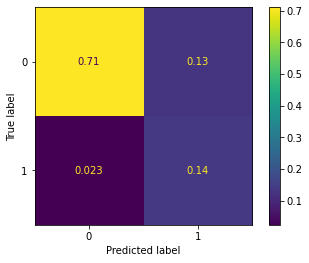

In [67]:
#model performance evaluation on train set
perf_log_reg_train_set = model_performance(log_reg_01, X_train, y_train)
print(f'''Model Performance on training set 
{perf_log_reg_train_set}''')
plot_confusion_matrix(log_reg_01, X_train, y_train, normalize='all');

The recall on the train set is fairly good of 85% and the FN in the confusion matrix shows 2.3% only which reflects a very good performance, yet the precision is low but the accuracy is good.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.846761  0.832924   0.514416  0.636023


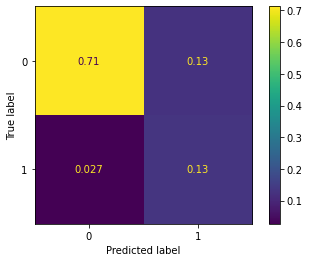

In [68]:
#model performance evaluation on validarion set
perf_log_reg_val_set = model_performance(log_reg_01, X_val, y_val)
print(f'''Model Performance on training set 
{perf_log_reg_val_set}''')
plot_confusion_matrix(log_reg_01, X_val, y_val, normalize='all');

The recall on the validation set is very close the the recall on the training set which reflects a regularized model

## Decision Tree


In [69]:
#creating the decission tree classifier by limiting the max_depth to 5 to reduce the model overfitting
model_2 = DecisionTreeClassifier(random_state=1, max_depth=5)
dTree_1 = model_2.fit(X_train, y_train)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.942462  0.842623   0.807541  0.824709


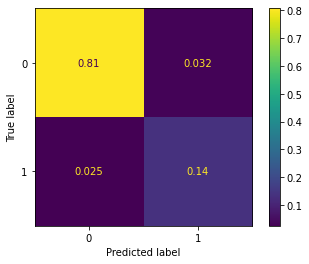

In [70]:
#model performance evaluation on train set
perf_dTree_train_set = model_performance(dTree_1, X_train, y_train)
print(f'''Model Performance on training set 
{perf_dTree_train_set}''')
plot_confusion_matrix(dTree_1, X_train, y_train, normalize='all');

The recall on the train set is fairly good of 84% (slightly less than the logistic regression model) and the FN in the confusion matrix shows 2.5% only which reflects a very good performance. The precision and Accuracy are higher than of the logistic regression model

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.922591  0.776413   0.750594  0.763285


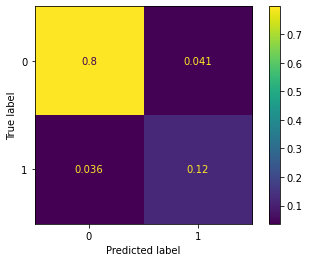

In [71]:
#model performance evaluation on Validation set
perf_dTree_val_set = model_performance(dTree_1, X_val, y_val)
print(f'''Model Performance on training set 
{perf_dTree_val_set}''')
plot_confusion_matrix(dTree_1, X_val, y_val, normalize='all');

The model performance on the validation set is worse than on the train set showing a slight overfit in the model compared to the regularized logistic regression model.

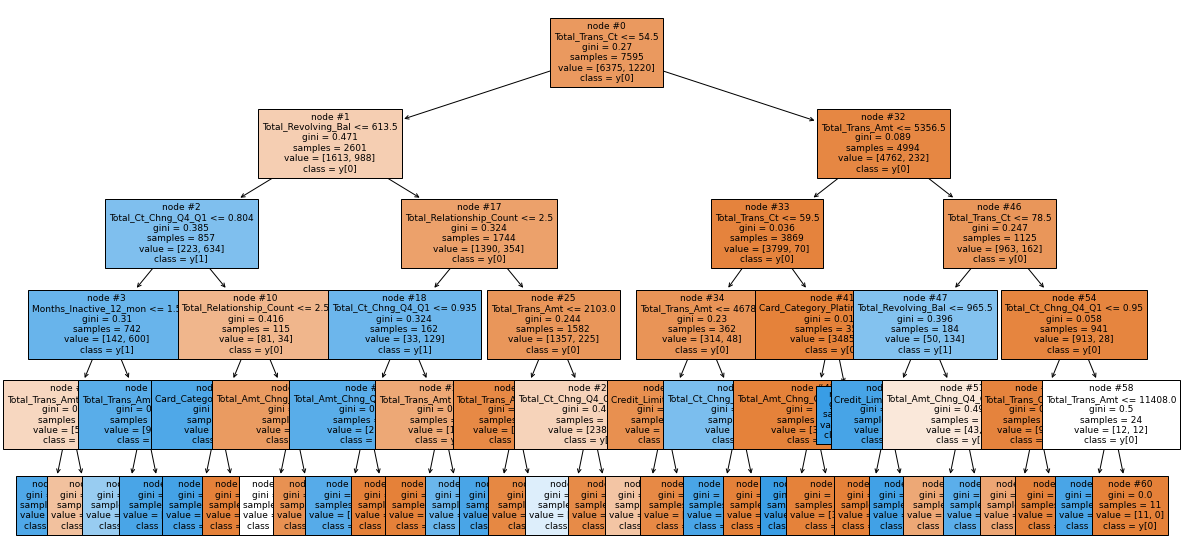

In [72]:
#As decision trees are useful for data exploration, let us visualize the tree and explore the variables split applied
feature_names = list(X_train.columns)
plt.figure(figsize=(20,10))
tree.plot_tree(dTree_1, feature_names = feature_names, filled=True, fontsize=9,node_ids=True, class_names=True)
plt.show()

The decision tree first split is at the variable **Total_Trans_Ct** and the second split is created at the **Total_Revolving_Bal** and the **Total_Trans_Amt** , then followed by the **Total_Relationship_Ct** and **Total_Ct_Chng_Q1_Q4** wich were all identified as strong predictors in the EDA.

### Adaboost Classifier

In [73]:
#an adaboost classifier is creaited using the base estimatore as the logistic regression model created in model_1
#this base estimator is preferred over the default decision tree as it yielded a well performing generalized model
model_3 = AdaBoostClassifier(base_estimator = model_1, random_state=1 )
adaboost_1 = model_3.fit(X_train, y_train)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0   0.84108  0.848361    0.50316  0.631675


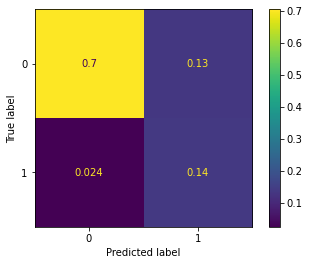

In [74]:
#model performance evaluation on train set
perf_adaboost_train_set = model_performance(adaboost_1, X_train, y_train)
print(f'''Model Performance on training set 
{perf_adaboost_train_set}''')
plot_confusion_matrix(adaboost_1, X_train, y_train, normalize='all');

The model performance is very close to the logistic regression model yet with a slightly lower recall score and slightly higher FN ratio. Let us explore the performance on the validation set.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.838468  0.820639   0.498507  0.620241


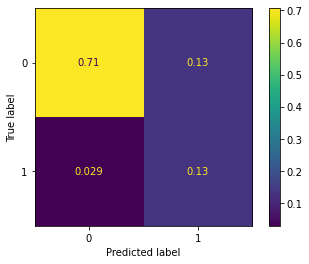

In [75]:
#model performance evaluation on val set
perf_adaboost_val_set = model_performance(adaboost_1, X_val, y_val)
print(f'''Model Performance on training set 
{perf_adaboost_val_set}''')
plot_confusion_matrix(adaboost_1,  X_val, y_val, normalize='all');

A very good performance is observed on the validation set with no overfitting which means the model is generalized and robust. The performance of the logistic regression model still is better, yet this model presents the second best performing model thus far.

### Gredient Boosting Classifier

In [76]:
#creating a Gradient boosting classifier model using the Logistic regression model_1 as its init parameter
model_4 = GradientBoostingClassifier(init = model_1, random_state=1)
gboost_1 = model_4.fit(X_train, y_train)

Model Performance on training set 
   Accuracy   Recall  Precision        F1
0  0.977617  0.89918   0.958916  0.928088


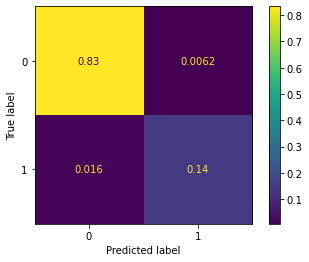

In [77]:
#model performance evaluation on train set
perf_gboost_train_set = model_performance(gboost_1, X_train, y_train)
print(f'''Model Performance on training set 
{perf_gboost_train_set}''')
plot_confusion_matrix(gboost_1, X_train, y_train, normalize='all');

The model performance is very good, the recall is higher than all recalls derived from adaboost and logistic regression. The FN ratio is also lower, it is yet to confirm if this model is genearlized or not.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.967615  0.850123   0.942779  0.894057


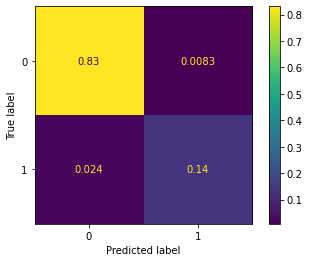

In [78]:
#model performance evaluation on val set
perf_gboost_val_set = model_performance(gboost_1,  X_val, y_val)
print(f'''Model Performance on training set 
{perf_gboost_val_set}''')
plot_confusion_matrix(gboost_1,  X_val, y_val, normalize='all');

The model performance on the validation set shows that the model is not overfitting, yet it is less generalized when compared to the logistic regression and adaboost models. 

### XGBoost Classifier

In [79]:
#creating an XGBoost classifier with eval_metric:logloss and max_depth=3 to minimize the overfitting
model_5 = XGBClassifier(random_state=1, eval_metric='logloss', max_depth=3)
xgb_1 = model_5.fit(X_train,y_train)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.990125  0.961475   0.976686  0.969021


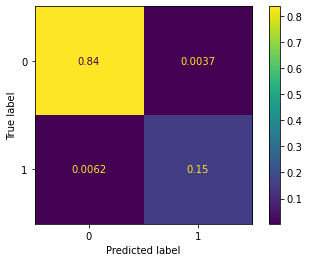

In [80]:
#model performance evaluation on train set
perf_xgboost_train_set = model_performance(xgb_1, X_train, y_train)
print(f'''Model Performance on training set 
{perf_xgboost_train_set}''')
plot_confusion_matrix(xgb_1, X_train, y_train, normalize='all');

The model performance on the train set is very good with a high recall score and very small FN Ratio. The Precision and accuracy are also very high.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.971959  0.886978   0.935233  0.910467


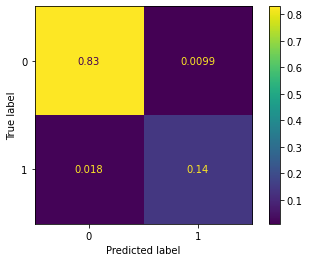

In [81]:
#model performance evaluation on val set
perf_xgboost_val_set = model_performance(xgb_1, X_val, y_val)
print(f'''Model Performance on training set 
{perf_xgboost_val_set}''')
plot_confusion_matrix(xgb_1, X_val, y_val, normalize='all');

The performance dropped on the validation set yet within acceptable limits of slight overfitting. The Accuracy and precision scores dropped very slightly

### Stacking Classifier

In [82]:
estimators = [('Logistic regression',log_reg_01), ('Decision Tree',dTree_1), ('Ada Boost',adaboost_1), 
              ('XGboost',xgb_1)]

final_estimator = gboost_1

model_6= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier = model_6.fit(X_train,y_train)

Model Performance on training set 
   Accuracy    Recall  Precision      F1
0  0.988545  0.963115   0.965489  0.9643


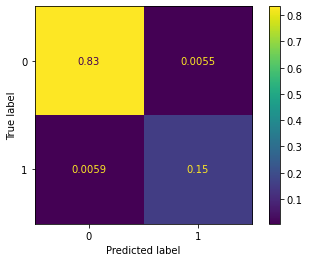

In [83]:
#model performance evaluation on train set
perf_stacking_train_set = model_performance(stacking_classifier, X_train, y_train)
print(f'''Model Performance on training set 
{perf_stacking_train_set}''')
plot_confusion_matrix(stacking_classifier, X_train, y_train, normalize='all');

The model perfirnance on the train set is very close to the XGBoost model with a very good recall, precision and accuracy scores.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.973539  0.904177   0.929293  0.916563


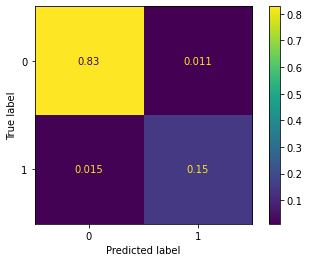

In [84]:
#model performance evaluation on train set
perf_stacking_val_set = model_performance(stacking_classifier,  X_val, y_val)
print(f'''Model Performance on training set 
{perf_stacking_val_set}''')
plot_confusion_matrix(stacking_classifier,  X_val, y_val, normalize='all');

The model performance on the validation set shows less overfitting when compared to the XGBoost model. The recall score is the highest observed so far yet the FN Ratio has increased almost the double from 0.06 to 0.015 yet it is still considered low and the model performance is acceptable as a good model.

**Summary:** 
- The Bagging and Random Forest algorithms were trialed yet they showed a very high overfitting models. Hence, they were not included in the notebook and the six algorthims chosen for this classification problem are:
 - Model 1: logistic Regression
 - Model 2: Decision Tree
 - Model 3: AdaBoost
 - Model 4: Gradient Boost
 - Model 5: XGBoost
 - Model 6: Stacking

Let us sum up the model performances:

In [85]:
models = ['logistic Regression', 'Decision Tree','AdaBoost','Gradient Boost','XGBoost','Stacking']

models_train_perf = pd.concat([perf_log_reg_train_set,
perf_dTree_train_set,
perf_adaboost_train_set,
perf_gboost_train_set,
perf_xgboost_train_set,
perf_stacking_train_set],axis=0)

models_train_perf.set_index([pd.Index(models)], inplace=True)

models_val_perf = pd.concat([perf_log_reg_val_set,
perf_dTree_val_set,
perf_adaboost_val_set,
perf_gboost_val_set,
perf_xgboost_val_set,
perf_stacking_val_set],axis=0)

models_val_perf.set_index([pd.Index(models)], inplace=True)

print("Training performance VS Validation performance comparison:")

all_models = pd.concat([models_train_perf,models_val_perf],axis=1 )
all_models


Training performance VS Validation performance comparison:


,Accuracy,Recall,Precision,F1,Accuracy,Recall,Precision,F1
logistic Regression,0.848058,0.854918,0.516337,0.643827,0.846761,0.832924,0.514416,0.636023
Decision Tree,0.942462,0.842623,0.807541,0.824709,0.922591,0.776413,0.750594,0.763285
AdaBoost,0.841080,0.848361,0.503160,0.631675,0.838468,0.820639,0.498507,0.620241
Gradient Boost,0.977617,0.899180,0.958916,0.928088,0.967615,0.850123,0.942779,0.894057
XGBoost,0.990125,0.961475,0.976686,0.969021,0.971959,0.886978,0.935233,0.910467
Stacking,0.988545,0.963115,0.965489,0.964300,0.973539,0.904177,0.929293,0.916563


The top performing models are the XGBoost, Stacking and Gradient Boost. Yet the models showing the least overfit are the logistic regression and the decision Adaboost. 

## Model building - Oversampled data
- Build 6 models using oversampled data (from logistic regression, decision trees, bagging and boosting methods) - You can choose not to build XGBoost if you are facing issues with the installation

### Oversampling train data using SMOTE

In [86]:
#the SMOTE alogrithm is applied with a strategy of 0.5
sm = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [87]:
print(f'''Classes ratio Before Oversampling:
{y_train.value_counts()}''')

print(f'''Classes ratio After Oversampling:
{y_train_over.value_counts()}''')

Classes ratio Before Oversampling:
0    6375
1    1220
Name: Attrition_Flag, dtype: int64
Classes ratio After Oversampling:
0    6375
1    3187
Name: Attrition_Flag, dtype: int64


## Training the models using the over sampled train data

### Logistic Regression

In [88]:
#displaing the ratio of classes in the target variable to set the class_weight in the alogorithm
y_train_over.value_counts(normalize=True)

0    0.666702
1    0.333298
Name: Attrition_Flag, dtype: float64

In [89]:
#creating a logistic regression model using 'newton-cg' solver for its better performance on large data sets
#Also, class_weight is applied to handle the imbalance in the target variable
model_7 = LogisticRegression(random_state=1, class_weight = {0:0.333298 , 1:0.333298}, solver = 'newton-cg')
log_reg_02 = model_7.fit(X_train_over, y_train_over)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.904309  0.827738   0.878162  0.852205


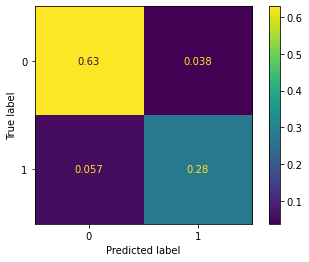

In [90]:
#model performance evaluation on train set
perf_log_reg_train_set_over = model_performance(log_reg_02, X_train_over, y_train_over)
print(f'''Model Performance on training set 
{perf_log_reg_train_set_over}''')
plot_confusion_matrix(log_reg_02, X_train_over, y_train_over, normalize='all');

The recall on the train set is fairly good of 82% and the FN in the confusion matrix shows 5.7% only which reflects a very good performance yet this performance is lower compared to the non-sampled data, yet the precision is better.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.888231  0.619165   0.663158  0.640407


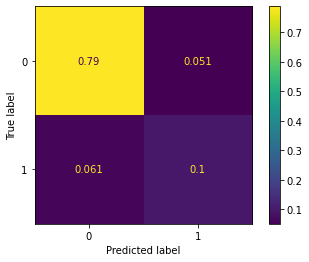

In [91]:
#model performance evaluation on validarion set
perf_log_reg_val_set_over = model_performance(log_reg_02, X_val, y_val)
print(f'''Model Performance on training set 
{perf_log_reg_val_set_over}''')
plot_confusion_matrix(log_reg_02, X_val, y_val, normalize='all');

The recall on the validation set dropped significantly which reflects an overfit model.

## Decision Tree


In [92]:
#creating the decission tree classifier by limiting the max_depth to 5 to reduce the model overfitting
model_8 = DecisionTreeClassifier(random_state=1, max_depth=5)
dTree_2 = model_8.fit(X_train_over, y_train_over)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.935265  0.889238   0.914194  0.901543


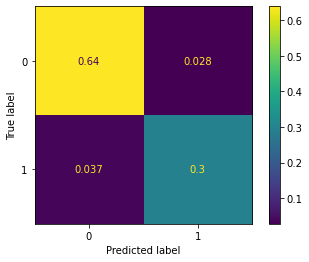

In [93]:
#model performance evaluation on train set
perf_dTree_train_set_over = model_performance(dTree_2, X_train_over, y_train_over)
print(f'''Model Performance on training set 
{perf_dTree_train_set_over}''')
plot_confusion_matrix(dTree_2, X_train_over, y_train_over, normalize='all');

The recall on the train set has increased from 84% on the non-sampled data to 89% for the over sampled data. The performance is also better than the logistic regression model performance.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.922196  0.793612   0.740826  0.766311


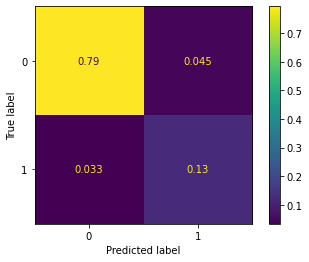

In [94]:
#model performance evaluation on Validation set
perf_dTree_val_set_over = model_performance(dTree_2, X_val, y_val)
print(f'''Model Performance on training set 
{perf_dTree_val_set_over}''')
plot_confusion_matrix(dTree_2, X_val, y_val, normalize='all');

The model performance on the validation set is yet slightly better than the model with the non-sampled data, yet it relfects more overfitting.

### Adaboost Classifier

In [95]:
#an adaboost classifier is creaited using the base estimatore as the logistic regression model created in model_1
#this base estimator is preferred over the default decision tree as it yielded a well performing generalized model
model_9 = AdaBoostClassifier(base_estimator = model_1, random_state=1 )
adaboost_2 = model_9.fit(X_train_over, y_train_over)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.815624  0.951679   0.653382  0.774812


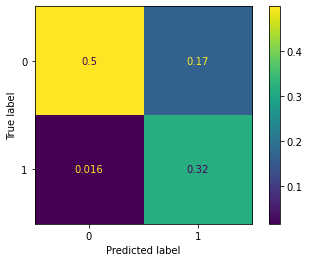

In [96]:
#model performance evaluation on train set
perf_adaboost_train_set_over = model_performance(adaboost_2, X_train_over, y_train_over)
print(f'''Model Performance on training set 
{perf_adaboost_train_set_over}''')
plot_confusion_matrix(adaboost_2, X_train_over, y_train_over, normalize='all');

The model performance is better than logistic regression model and decision tree and also better than the Adaboost model on the non-sampled data.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.775671  0.894349   0.409449  0.561728


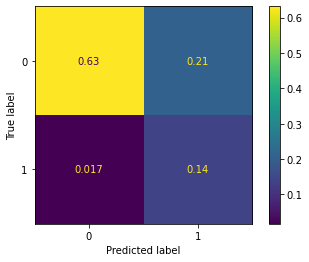

In [97]:
#model performance evaluation on val set
perf_adaboost_val_set_over = model_performance(adaboost_2, X_val, y_val)
print(f'''Model Performance on training set 
{perf_adaboost_val_set_over}''')
plot_confusion_matrix(adaboost_2,  X_val, y_val, normalize='all');

A very good performance is observed on the validation set with slight overfitting which means the model is generalized and robust. Thus far, the Adaboost model is a better performing and generalized model than Decision tree and logistic regresson on the over-sampled data. It is very close to the XGBoost performance on the non-sampled data.

### Gredient Boosting Classifier

In [98]:
#creating a Gradient boosting classifier model using the Logistic regression model_1 as its init parameter
model_10 = GradientBoostingClassifier(init = model_1, random_state=1)
gboost_2 = model_10.fit(X_train_over, y_train_over)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.979607  0.962347    0.97613  0.969189


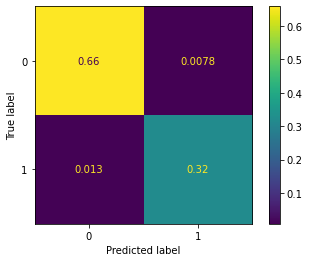

In [99]:
#model performance evaluation on train set
perf_gboost_train_set_over = model_performance(gboost_2, X_train_over, y_train_over)
print(f'''Model Performance on training set 
{perf_gboost_train_set_over}''')
plot_confusion_matrix(gboost_2, X_train_over, y_train_over, normalize='all');

The model performance is very good, the recall is higher than all recalls derived from adaboost and logistic regression and Decision tree. The FN ratio is also lower, it is yet to confirm if this model is genearlized or not.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.962875  0.857494   0.906494  0.881313


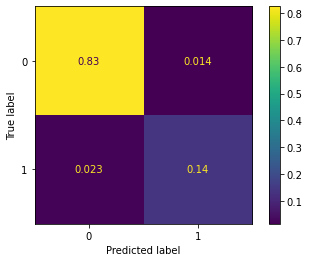

In [100]:
#model performance evaluation on val set
perf_gboost_val_set_over = model_performance(gboost_2,  X_val, y_val)
print(f'''Model Performance on training set 
{perf_gboost_val_set_over}''')
plot_confusion_matrix(gboost_2,  X_val, y_val, normalize='all');

The model performance on the validation set shows that the model is slighting overfitting, yet it is less generalized when compared to the adaboost model. 

### XGBoost Classifier

In [101]:
#creating an XGBoost classifier with eval_metric:logloss and max_depth=3 to minimize the overfitting
model_11 = XGBClassifier(random_state=1, eval_metric='logloss', max_depth=3)
xgb_2 = model_11.fit(X_train_over,y_train_over)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.990125  0.961475   0.976686  0.969021


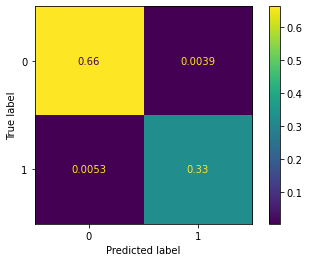

In [102]:
#model performance evaluation on train set
perf_xgboost_train_set_over = model_performance(xgb_2, X_train_over, y_train_over)
print(f'''Model Performance on training set 
{perf_xgboost_train_set}''')
plot_confusion_matrix(xgb_2, X_train_over, y_train_over, normalize='all');

The model performance on the train set is very good and very close to the recall observed on the GBoost model. It also shows a much smaller FN Ratio. The Precision and accuracy are also very high.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.971169  0.896806   0.921717  0.909091


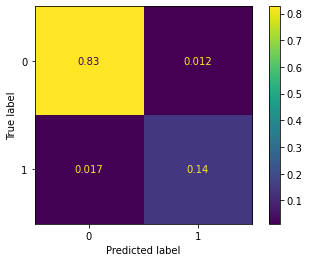

In [103]:
#model performance evaluation on val set
perf_xgboost_val_set_over = model_performance(xgb_2, X_val, y_val)
print(f'''Model Performance on training set 
{perf_xgboost_val_set_over}''')
plot_confusion_matrix(xgb_2, X_val, y_val, normalize='all');

The performance dropped on the validation set slightly which means a slight overfit yet within acceptable limits . The Accuracy and precision scores dropped very slightly

### Stacking Classifier

In [104]:
estimators = [('Logistic regression',log_reg_02), ('Decision Tree',dTree_2), ('Ada Boost',adaboost_2), 
              ('Gboost',xgb_2)]

final_estimator = gboost_2

model_12= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier_2 = model_12.fit(X_train,y_train)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.979921  0.953248   0.986043  0.969368


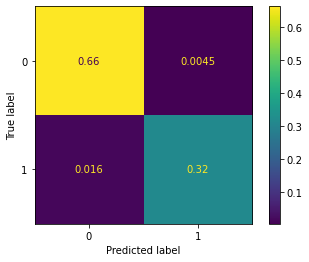

In [105]:
#model performance evaluation on train set
perf_stacking_train_set_over = model_performance(stacking_classifier_2, X_train_over, y_train_over)
print(f'''Model Performance on training set 
{perf_stacking_train_set_over}''')
plot_confusion_matrix(stacking_classifier_2, X_train_over, y_train_over, normalize='all');

The model perfirnance on the train set is very close to the Adaboost model which is slightly lower than the recall observed with XGBoost and GBoost. It is also slightly less than the performance observed with the non-sampled data.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.971959  0.906634    0.91791  0.912237


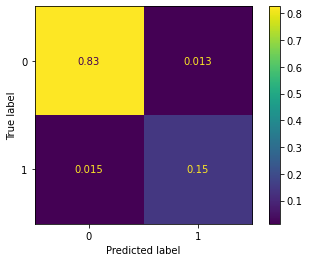

In [106]:
#model performance evaluation on train set
perf_stacking_val_set_over = model_performance(stacking_classifier_2,  X_val, y_val)
print(f'''Model Performance on training set 
{perf_stacking_val_set_over}''')
plot_confusion_matrix(stacking_classifier_2,  X_val, y_val, normalize='all');

The model performance on the validation set shows less overfitting when compared to the all previous models using the oversampled data. Hence, this model is considered the best performing generalized model so far.

In [107]:
models_2 = ['logistic Regression', 'Decision Tree','AdaBoost','Gradient Boost','XGBoost','Stacking']

models_train_perf_over = pd.concat([perf_log_reg_train_set_over,
perf_dTree_train_set_over,
perf_adaboost_train_set_over,
perf_gboost_train_set_over,
perf_xgboost_train_set_over,
perf_stacking_train_set_over],axis=0)

models_train_perf_over.set_index([pd.Index(models_2)], inplace=True)


models_val_perf_over = pd.concat([perf_log_reg_val_set_over,
perf_dTree_val_set_over,
perf_adaboost_val_set_over,
perf_gboost_val_set_over,
perf_xgboost_val_set_over,
perf_stacking_val_set_over],axis=0)

models_val_perf_over.set_index([pd.Index(models_2)], inplace=True)

print("Training performance VS Validation performance comparison with Over-Sampled Train Data:")

all_models_over = pd.concat([models_train_perf_over,models_val_perf_over],axis=1 )
all_models_over

Training performance VS Validation performance comparison with Over-Sampled Train Data:


,Accuracy,Recall,Precision,F1,Accuracy,Recall,Precision,F1
logistic Regression,0.904309,0.827738,0.878162,0.852205,0.888231,0.619165,0.663158,0.640407
Decision Tree,0.935265,0.889238,0.914194,0.901543,0.922196,0.793612,0.740826,0.766311
AdaBoost,0.815624,0.951679,0.653382,0.774812,0.775671,0.894349,0.409449,0.561728
Gradient Boost,0.979607,0.962347,0.976130,0.969189,0.962875,0.857494,0.906494,0.881313
XGBoost,0.990797,0.983997,0.988339,0.986164,0.971169,0.896806,0.921717,0.909091
Stacking,0.979921,0.953248,0.986043,0.969368,0.971959,0.906634,0.917910,0.912237


The top performing models on the oversampled data are: Stacking, XGBoost and the adaboost. The Logistic Regression and Decision tree are showing lower performance and higher overfit. The gradient boost is showing a fairly good performance yet it showing a significant overfit.


## Model building - Undersampled data

### Undersampling train data using random undersampling

In [108]:
random_us = RandomUnderSampler(random_state=1, sampling_strategy = 0.5)
X_train_un, y_train_un = random_us.fit_resample(X_train, y_train)

In [109]:
print(f'''Classes ratio Before Undersampling:
{y_train.value_counts()}''')

print(f'''Classes ratio After Undersampling:
{y_train_un.value_counts()}''')

Classes ratio Before Undersampling:
0    6375
1    1220
Name: Attrition_Flag, dtype: int64
Classes ratio After Undersampling:
0    2440
1    1220
Name: Attrition_Flag, dtype: int64


## Training the models using the under sampled train data

### Logistic Regression

In [110]:
#displaing the ratio of classes in the target variable to set the class_weight in the alogorithm
y_train_un.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: Attrition_Flag, dtype: float64

In [111]:
#creating a logistic regression model using 'newton-cg' solver for its better performance on large data sets
#Also, class_weight is applied to handle the imbalance in the target variable
model_13 = LogisticRegression(random_state=1, class_weight = {0:0.333333 , 1:0.666667}, solver = 'newton-cg')
log_reg_03 = model_13.fit(X_train_un, y_train_un)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.852732  0.858197   0.740977  0.795291


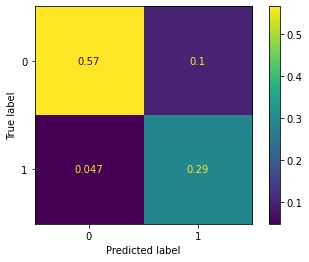

In [112]:
#model performance evaluation on train set
perf_log_reg_train_set_un = model_performance(log_reg_03, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_log_reg_train_set_un}''')
plot_confusion_matrix(log_reg_03, X_train_un, y_train_un, normalize='all');

The recall on the train set is fairly good of 85% and the FN in the confusion matrix shows 4.7% only which reflects a very good performance which is better than the performance  on the non-sampled and oversampled data, yet the precision is lower compared to the over-sampled data trained model.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.844787  0.832924   0.510542  0.633053


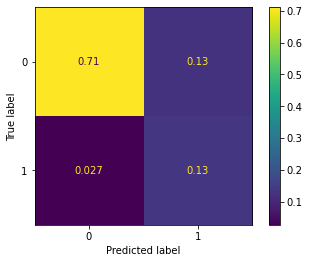

In [113]:
#model performance evaluation on validarion set
perf_log_reg_val_set_un = model_performance(log_reg_03, X_val, y_val)
print(f'''Model Performance on training set 
{perf_log_reg_val_set_un}''')
plot_confusion_matrix(log_reg_03, X_val, y_val, normalize='all');

The recall on the validation set dropped slightly showing a regularized model with very slight overfitting which is better than the over-sampled data model.

## Decision Tree


In [114]:
#creating the decission tree classifier by limiting the max_depth to 5 to reduce the model overfitting
model_14 = DecisionTreeClassifier(random_state=1, max_depth=5)
dTree_3 = model_14.fit(X_train_un, y_train_un)

Model Performance on training set 
   Accuracy    Recall  Precision       F1
0  0.934699  0.879508    0.92103  0.89979


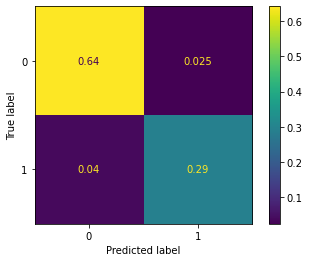

In [115]:
#model performance evaluation on train set
perf_dTree_train_set_un = model_performance(dTree_3, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_dTree_train_set_un}''')
plot_confusion_matrix(dTree_3, X_train_un, y_train_un, normalize='all');

The recall on the train set has reduced slightly from 89% on the oversampled data to 88% on the undersampled data.The performance is also better than the logistic regression model performance.

Model Performance on training set 
   Accuracy    Recall  Precision       F1
0   0.92654  0.818182   0.748315  0.78169


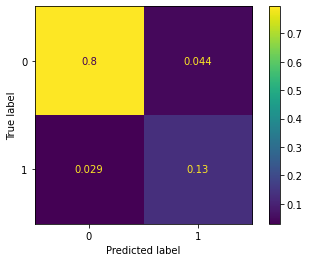

In [116]:
#model performance evaluation on Validation set
perf_dTree_val_set_un = model_performance(dTree_3, X_val, y_val)
print(f'''Model Performance on training set 
{perf_dTree_val_set_un}''')
plot_confusion_matrix(dTree_3, X_val, y_val, normalize='all');

The model performance on the validation set has dropped showing a very slight overfitting, yet still within the acceptable range. Hence, the model with the undersampled data is better than both the model with the non-sampled and the one with the oversampled training data.

### Adaboost Classifier

In [117]:
#an adaboost classifier is creaited using the base estimatore as the logistic regression model created in model_1
#this base estimator is preferred over the default decision tree as it yielded a well performing generalized model
model_15 = AdaBoostClassifier(base_estimator = model_1, random_state=1 )
adaboost_3 = model_15.fit(X_train_un, y_train_un)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.783333  0.936066    0.61497  0.742281


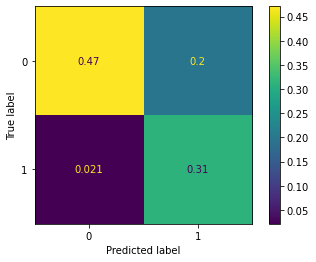

In [118]:
#model performance evaluation on train set
perf_adaboost_train_set_un = model_performance(adaboost_3, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_adaboost_train_set_un}''')
plot_confusion_matrix(adaboost_3, X_train_un, y_train_un, normalize='all');

The model performance is better than logistic regression model and decision tree, yet slightly less than the Adaboost model on the over-sampled data.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.758294  0.921376    0.39267  0.550661


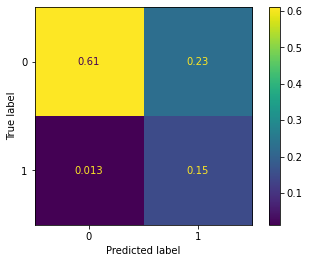

In [119]:
#model performance evaluation on val set
perf_adaboost_val_set_un = model_performance(adaboost_3, X_val, y_val)
print(f'''Model Performance on training set 
{perf_adaboost_val_set_un}''')
plot_confusion_matrix(adaboost_3,  X_val, y_val, normalize='all');

A very good performance is observed on the validation set with less overfitting that was observed with the oversampled model. Hence, this model is better performing and more generalized when compared to the non-sampled and over-sampled data trained model.

### Gredient Boosting Classifier

In [120]:
#creating a Gradient boosting classifier model using the Logistic regression model_1 as its init parameter
model_16 = GradientBoostingClassifier(init = model_1, random_state=1)
gboost_3 = model_16.fit(X_train_un, y_train_un)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.977869  0.960656   0.972614  0.966598


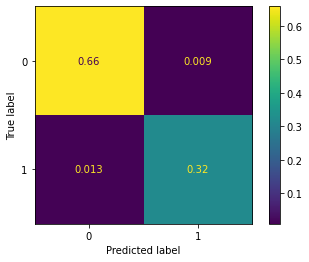

In [121]:
#model performance evaluation on train set
perf_gboost_train_set_un = model_performance(gboost_3, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_gboost_train_set_un}''')
plot_confusion_matrix(gboost_3, X_train_un, y_train_un, normalize='all');

The model performance is very good, the recall is higher than all recalls derived from adaboost and logistic regression and Decision tree. The FN ratio is also lower, yet its performance is very close to the oversampled trained model

Model Performance on training set 
   Accuracy   Recall  Precision        F1
0  0.964455  0.92629     0.8627  0.893365


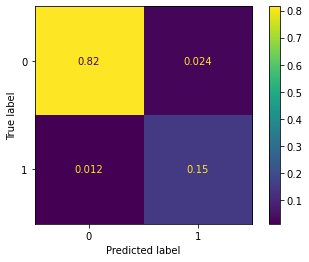

In [122]:
#model performance evaluation on val set
perf_gboost_val_set_un = model_performance(gboost_3,  X_val, y_val)
print(f'''Model Performance on training set 
{perf_gboost_val_set_un}''')
plot_confusion_matrix(gboost_3,  X_val, y_val, normalize='all');

The model performance on the validation set shows that the model is less overfitting than the model trained on the oversampled data. Hence, this model is the best performing and genaralized model compared tp the non-sampled and over-sampled trained GBoost models.

### XGBoost Classifier

In [123]:
#creating an XGBoost classifier with eval_metric:logloss and max_depth=3 to minimize the overfitting
model_17 = XGBClassifier(random_state=1, eval_metric='logloss', max_depth=3)
xgb_3 = model_17.fit(X_train_un,y_train_un)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.993169  0.988525   0.990961  0.989741


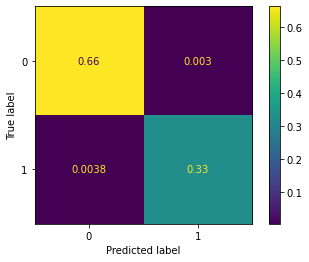

In [124]:
#model performance evaluation on train set
perf_xgboost_train_set_un = model_performance(xgb_3, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_xgboost_train_set_un}''')
plot_confusion_matrix(xgb_3, X_train_un, y_train_un, normalize='all');

The model performance on the train set is very good and better to the recall observed on the GBoost model, yet it is very close to the recall observed on the XGBoost model trained on the oversampled data.

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0   0.96169  0.933661   0.844444  0.886814


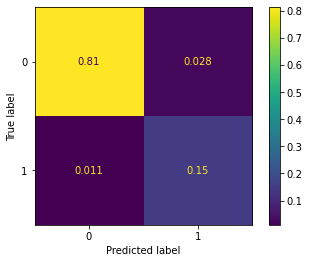

In [125]:
#model performance evaluation on val set
perf_xgboost_val_set_un = model_performance(xgb_3, X_val, y_val)
print(f'''Model Performance on training set 
{perf_xgboost_val_set_un}''')
plot_confusion_matrix(xgb_3, X_val, y_val, normalize='all');

The performance dropped on the validation set slightly which means a slight overfit yet the model is more generalized and better performing than the XGBoost models trained on non-sampled and over-sampled data.

### Stacking Classifier

In [126]:
estimators = [('Logistic regression',log_reg_03), ('Decision Tree',dTree_3), ('Ada Boost',adaboost_3), 
              ('Gboost',xgb_3)]

final_estimator = gboost_3

model_18= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier_3 = model_18.fit(X_train,y_train)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0   0.98388  0.965574   0.985774  0.975569


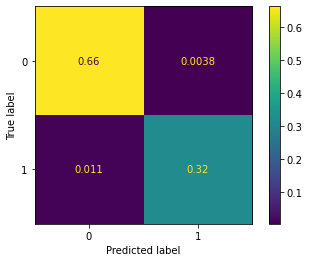

In [127]:
#model performance evaluation on train set
perf_stacking_train_set_un = model_performance(stacking_classifier_3, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_stacking_train_set_un}''')
plot_confusion_matrix(stacking_classifier_2, X_train_un, y_train_un, normalize='all');

The model perfirnance on the train set is very close to the Stacking model trained on the oversampled and the non-sampled data. It is less compared to the XGBoost model.

Model Performance on training set 
   Accuracy    Recall  Precision      F1
0  0.970379  0.894349   0.919192  0.9066


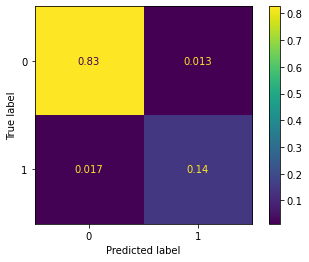

In [128]:
#model performance evaluation on train set
perf_stacking_val_set_un = model_performance(stacking_classifier_3,  X_val, y_val)
print(f'''Model Performance on training set 
{perf_stacking_val_set_un}''')
plot_confusion_matrix(stacking_classifier_3,  X_val, y_val, normalize='all');

The model performance on the validation set shows more overfitting when compared to stacking model trained on the oversampled data.

In [129]:
models = ['logistic Regression', 'Decision Tree','AdaBoost','Gradient Boost','XGBoost','Stacking']

models_train_perf_un = pd.concat([perf_log_reg_train_set_un,
perf_dTree_train_set_un,
perf_adaboost_train_set_un,
perf_gboost_train_set_un,
perf_xgboost_train_set_un,
perf_stacking_train_set_un],axis=0)

models_train_perf_un.set_index([pd.Index(models)], inplace=True)


models_val_perf_un = pd.concat([perf_log_reg_val_set_un,
perf_dTree_val_set_un,
perf_adaboost_val_set_un,
perf_gboost_val_set_un,
perf_xgboost_val_set_un,
perf_stacking_val_set_un],axis=0)

models_val_perf_un.set_index([pd.Index(models_2)], inplace=True)

print("Training performance VS Validation performance comparison with Under-Sampled Train Data:")

all_models_un = pd.concat([models_train_perf_un,models_val_perf_un],axis=1 )
all_models_un

Training performance VS Validation performance comparison with Under-Sampled Train Data:


,Accuracy,Recall,Precision,F1,Accuracy,Recall,Precision,F1
logistic Regression,0.852732,0.858197,0.740977,0.795291,0.844787,0.832924,0.510542,0.633053
Decision Tree,0.934699,0.879508,0.921030,0.899790,0.926540,0.818182,0.748315,0.781690
AdaBoost,0.783333,0.936066,0.614970,0.742281,0.758294,0.921376,0.392670,0.550661
Gradient Boost,0.977869,0.960656,0.972614,0.966598,0.964455,0.926290,0.862700,0.893365
XGBoost,0.993169,0.988525,0.990961,0.989741,0.961690,0.933661,0.844444,0.886814
Stacking,0.983880,0.965574,0.985774,0.975569,0.970379,0.894349,0.919192,0.906600


The best performing models are the XGBoost, Gradient boost and Adaboost. The Stacking gave a good performance yet a less generalized model compared to the top 3 performing models.  The desicion tree and logistic regressio gave generalized models yet with lower performance than the top 3 performing models. 

## Hyperparameter tuning using random search

Comparing all previous 18 models, the best 3 models moving forward to the hyper-parameter tuning are:
 - Model 15: Adabost with undersampled data
 - Model 16: GBoost with undersampled data
 - model 17: XGBoost with Undersampled data

In [130]:
models_to_tune = ['AdaBoost','Gradient Boost','XGBoost']

train_perf_to_tune= pd.concat([
perf_adaboost_train_set_un,
perf_gboost_train_set_un,
perf_xgboost_train_set_un],axis=0)

train_perf_to_tune.set_index([pd.Index(models_to_tune)], inplace=True)


val_perf_un = pd.concat([
perf_adaboost_val_set_un,
perf_gboost_val_set_un,
perf_xgboost_val_set_un],axis=0)

val_perf_un.set_index([pd.Index(models_to_tune)], inplace=True)

print("Training performance VS Validation performance comparison with the best 3 models to tune:")

to_tune_models = pd.concat([train_perf_to_tune,val_perf_un],axis=1 )
to_tune_models

Training performance VS Validation performance comparison with the best 3 models to tune:


,Accuracy,Recall,Precision,F1,Accuracy,Recall,Precision,F1
AdaBoost,0.783333,0.936066,0.614970,0.742281,0.758294,0.921376,0.392670,0.550661
Gradient Boost,0.977869,0.960656,0.972614,0.966598,0.964455,0.926290,0.862700,0.893365
XGBoost,0.993169,0.988525,0.990961,0.989741,0.961690,0.933661,0.844444,0.886814


## Tuning Adaboost 

In [131]:
model_15 = AdaBoostClassifier(random_state=1 )

# Parameter grid to pass in RandomizedSearchCV
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5),
                      DecisionTreeClassifier(max_depth=7)],
    "n_estimators": np.arange(10,150,10),
    "learning_rate":np.arange(0.1,2,0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model_15,
    param_distributions=parameters,
    n_iter=40,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 80, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3)} with CV score=0.9319672131147542:


In [132]:
#creating a new model with the tuned parameter
model_15_tuned =  AdaBoostClassifier(n_estimators= 80, learning_rate= 0.2, 
                                     base_estimator= DecisionTreeClassifier(max_depth=3),random_state=1 )
Adaboost_tuned = model_15_tuned.fit(X_train_un, y_train_un)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.993169  0.987705    0.99177  0.989733


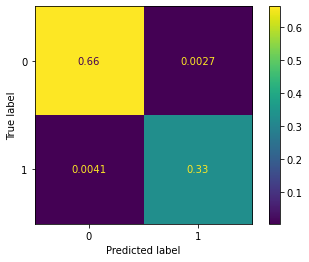

In [133]:
#model performance evaluation on train set
perf_ada_tuned_train_set = model_performance(Adaboost_tuned, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_ada_tuned_train_set}''')
plot_confusion_matrix(Adaboost_tuned, X_train_un, y_train_un, normalize='all');

Model Performance on validation set 
   Accuracy    Recall  Precision        F1
0  0.962085  0.921376   0.854214  0.886525


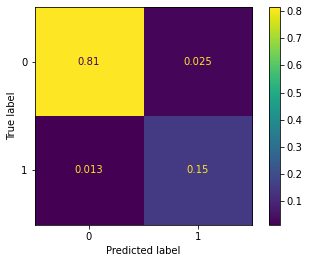

In [134]:
#model performance evaluation on val set
perf_ada_tuned_val_set = model_performance(Adaboost_tuned, X_val, y_val)
print(f'''Model Performance on validation set 
{perf_ada_tuned_val_set}''')
plot_confusion_matrix(Adaboost_tuned, X_val, y_val, normalize='all');

## Tuning Gradient Boost

In [135]:
model_16 = GradientBoostingClassifier(init = LogisticRegression(random_state=1, solver = 'newton-cg'), random_state=1)

# Parameter grid to pass in RandomizedSearchCV
# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,150,10),
    "subsample":np.arange(0.8,0.9,0.1),
    "max_features":np.arange(0.3,1,0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model_16,
    param_distributions=parameters,
    n_iter=40,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'n_estimators': 140, 'max_features': 0.4} with CV score=0.9245901639344263:


In [136]:
#creating a new model with the tuned parameter
model_16_tuned =  GradientBoostingClassifier(init=model_1, subsample= 0.8,
                                             n_estimators=140, max_features= 0.4, random_state=1 )
gboost_tuned = model_16_tuned.fit(X_train_un, y_train_un)

Model Performance on training set 
   Accuracy    Recall  Precision        F1
0  0.980328  0.967213   0.973597  0.970395


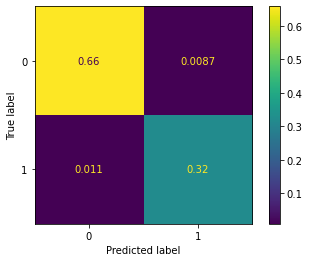

In [137]:
#model performance evaluation on train set
perf_gboost_tuned_train_set = model_performance(gboost_tuned, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_gboost_tuned_train_set}''')
plot_confusion_matrix(gboost_tuned, X_train_un, y_train_un, normalize='all');

Model Performance on validation set 
   Accuracy    Recall  Precision        F1
0  0.965245  0.921376    0.87007  0.894988


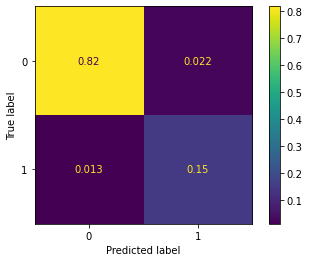

In [138]:
#model performance evaluation on train set
perf_gboost_tuned_val_set = model_performance(gboost_tuned, X_val, y_val)
print(f'''Model Performance on validation set 
{perf_gboost_tuned_val_set}''')
plot_confusion_matrix(gboost_tuned, X_val, y_val, normalize='all');

## Tuning XGBoost 

In [139]:
model_17 = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,50,10),
    "scale_pos_weight":np.arange(1,5,1),
    "subsample":np.arange(0.3,1,0.1),
    "learning_rate":np.arange(0.05, 0.1,0.01),
    "colsample_bytree":np.arange(0.3,1,0.1),
    "colsample_bylevel":np.arange(0.3,0.9,0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model_17,
    param_distributions=parameters,
    n_iter=40,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7000000000000002, 'scale_pos_weight': 4, 'n_estimators': 40, 'learning_rate': 0.060000000000000005, 'colsample_bytree': 0.9000000000000001, 'colsample_bylevel': 0.7000000000000002} with CV score=0.9639344262295081:


In [140]:
#creating a new model with the tuned parameter
model_17_tuned =  XGBClassifier(subsample=0.7, scale_pos_weight = 4, 
                                             n_estimators= 40, learning_rat= 0.06,
                                             colsample_bytree= 0.9, colsample_bylevel= 0.7, 
                                             random_state=1, eval_metric='logloss')
xgboost_tuned = model_17_tuned.fit(X_train_un, y_train_un)

[15:19:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { learning_rat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Model Performance on training set 
   Accuracy  Recall  Precision        F1
0  0.995628     1.0   0.987055  0.993485


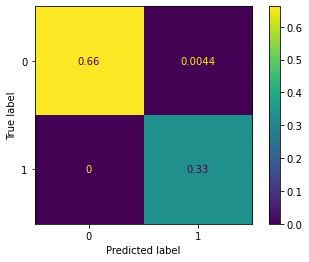

In [141]:
#model performance evaluation on train set
perf_xgboost_tuned_train_set = model_performance(xgboost_tuned, X_train_un, y_train_un)
print(f'''Model Performance on training set 
{perf_xgboost_tuned_train_set}''')
plot_confusion_matrix(xgboost_tuned, X_train_un, y_train_un, normalize='all');

Model Performance on validation set 
   Accuracy    Recall  Precision        F1
0  0.956161  0.945946   0.812236  0.874007


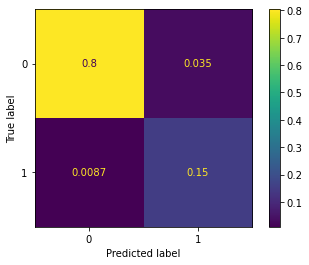

In [142]:
#model performance evaluation on val set
perf_xgboost_tuned_val_set = model_performance(xgboost_tuned, X_val, y_val)
print(f'''Model Performance on validation set 
{perf_xgboost_tuned_val_set}''')
plot_confusion_matrix(xgboost_tuned, X_val, y_val, normalize='all');

Model Performance on validation set 
   Accuracy    Recall  Precision        F1
0  0.957058  0.947692   0.814815  0.876245


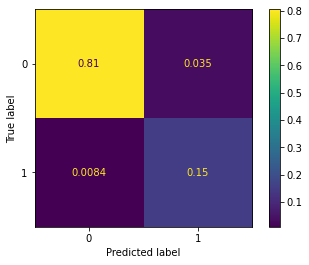

In [143]:
#model performance evaluation on test set
perf_xgboost_tuned_val_set = model_performance(xgboost_tuned, X_test, y_test)
print(f'''Model Performance on validation set 
{perf_xgboost_tuned_val_set}''')
plot_confusion_matrix(xgboost_tuned,X_test, y_test, normalize='all');

## Model Performances
- Compare the model performance of tuned models - Choose the best model

In [144]:
models_tuned = ['AdaBoost_tuned','Gradient Boost_tuned','XGBoost_tuned']

train_perf_tuned= pd.concat([
perf_ada_tuned_train_set,
perf_gboost_tuned_train_set,
perf_xgboost_tuned_train_set],axis=0)

train_perf_tuned.set_index([pd.Index(models_tuned)], inplace=True)


val_perf_tuned = pd.concat([
perf_ada_tuned_val_set,
perf_gboost_tuned_val_set,
perf_xgboost_tuned_val_set],axis=0)

val_perf_tuned.set_index([pd.Index(models_tuned)], inplace=True)

print("Training performance VS Validation performance comparison with the best 3 models to tune:")

tuned_models = pd.concat([train_perf_tuned,val_perf_tuned],axis=1 )
tuned_models

Training performance VS Validation performance comparison with the best 3 models to tune:


,Accuracy,Recall,Precision,F1,Accuracy,Recall,Precision,F1
AdaBoost_tuned,0.993169,0.987705,0.991770,0.989733,0.962085,0.921376,0.854214,0.886525
Gradient Boost_tuned,0.980328,0.967213,0.973597,0.970395,0.965245,0.921376,0.870070,0.894988
XGBoost_tuned,0.995628,1.000000,0.987055,0.993485,0.957058,0.947692,0.814815,0.876245


**Conclusion**:



The Tuned XGBoost model perfromance is showing the best recall on the validation set. Yet, the GBoost model is showing the least overfitting. Hence, based on the performance,  the model moving on to the production is the **XGBoost_tuned** model.

### Feature importance for tuned GBoost model

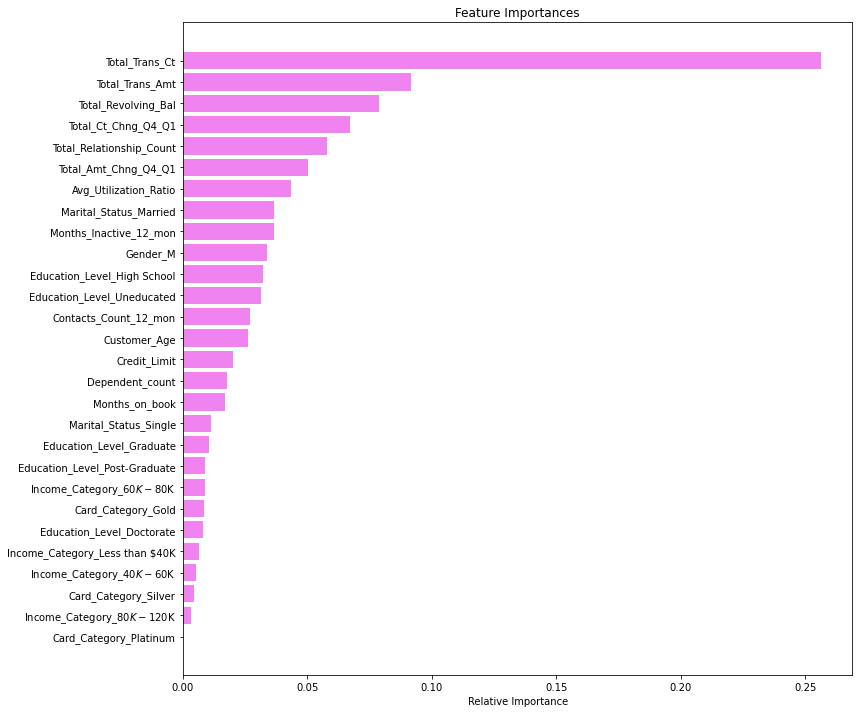

In [145]:
feature_names = X_train.columns
importances = xgboost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

As observed during the EDA, four of the strongest predictors are confirmed by the final model + 1 of the medium predictors:
1. **Total_Trans_Ct**
2. **Total_Trans_Amt**
3. **Total_Revolving_Bal**
4. **Total_Ct_Chng_Q4_Q1**
5. **Total_Relationship_count**

## Productionize the model
Now, as we have a final model we will use pipelines to put the model into production. We will start by creating a column transformer pipeline to handle any missing values in numercial and categorical variables, in addition to performing one hot encoding on the categorical variables. Last step is creating the final pipeline with the model and fitting it to the train data and finally observing the performance on the test set.

### 1.  Column Transformer 


In [146]:
#we will import the make_column_selector to apply the imputers on each the numerical and categorical variables
from sklearn.compose import make_column_selector as selector

In [147]:
#creating the numerical transformer using the sipmle imputer with strategy "median" and applying a standard scaler
numerical_transformer = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

#creating the categorical transformer using the sipmle imputer with strategy "most_frequent"
categorical_transformer= make_pipeline(SimpleImputer(strategy="most_frequent"),
                                      OneHotEncoder(handle_unknown="ignore"))

#creating the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, selector(dtype_exclude="category")),
        ('cat', categorical_transformer, selector(dtype_include="category"))
    ],
    remainder="passthrough",
)

### 2. Separating target variable and other variables

In [160]:
X = df.drop(columns="Attrition_Flag",axis=1)
y= df["Attrition_Flag"].replace(['Existing Customer','Attrited Customer'],[0,1])

#replacing the junk value with NaN
X['Income_Category'] = X['Income_Category'].replace('abc', np.NaN)

#converting the objects into category
for i in categorical:
    X[i] = X[i] .astype('category')

### 3. Splitting the data to train and test
As we already know the best model we need to process with, so we don't need to divide data into 3 sets - train, validation and test

In [161]:
#splitting the data into train and test via 70:30 ratio.
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train_p.shape,X_test_p.shape )

(7088, 18) (3039, 18)


### 4. Creating the final pipeline with the model

In [162]:
model = make_pipeline(preprocessor,XGBClassifier(subsample=0.7, scale_pos_weight = 4, 
                                             n_estimators= 40, learning_rat= 0.06,
                                             colsample_bytree= 0.9, colsample_bylevel= 0.7, 
                                            random_state=1, eval_metric='logloss'))

In [163]:
#fitting the model on the training set
model.fit(X_train_final, y_train_final)

[15:59:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { learning_rat } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feaa85fc7c0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy=...
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interacti

Model Performance on training set 
   Accuracy  Recall  Precision        F1
0  0.995062     1.0   0.970187  0.984868


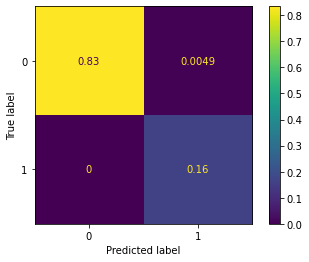

In [164]:
#model performance evaluation on training set
final_train_set = model_performance(model, X_train_final, y_train_final)
print(f'''Model Performance on training set 
{final_train_set}''')
plot_confusion_matrix(model, X_train_final, y_train_final, normalize='all');

Model Performance on test set 
   Accuracy    Recall  Precision        F1
0  0.971372  0.936475   0.890838  0.913087


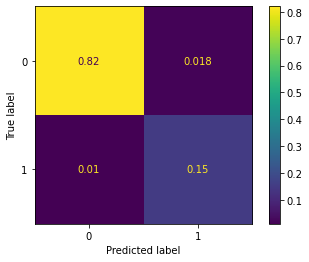

In [165]:
#model performance evaluation on test set
final_test_set = model_performance(model, X_test_final, y_test_final)
print(f'''Model Performance on test set 
{final_test_set}''')
plot_confusion_matrix(model, X_test_final, y_test_final, normalize='all');

The final recall observed on the test set is very good, yet the model is slightly overfitting but still within the acceptable limits.

## Actionable Insights & Recommendations
### Business insights:
- The Univarate Analysis shows the below common characteristics among customers:
    - 16.1% of the customers as Attrited and 83.9% as existing
    - 53% of the client base are females
    - 93% carry the Blue card
    - 35% belong to the Income_category less than USD 40K
    - 46% of customers are married
    - 30% are graduates 
- The Bivariate Analysis showed:
    - The **Credit_Limit and Avg_Open_To_Buy** variables are very strongy correlated
    - The **Total_Trans_Amt and Total_Trans_Ct** variables are strongly correlated
- The Strong Predictors and their Relation ship between variables and target variable are:
    - Attrited customers have less **Total_Revolving_Bal,Total_Trans_Ct,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1 and Total_Relationship_Count** than Existing customers
    - **Card_Category** shows The highest ratio of Attrited customers as Platinum card holders.
    
### Classification model sum up:
- The algorithm applied to derive the final classifiction is XGBoost model with its hyperparameter tuned using Randomized Search
- The final model assures 92% prediction rate of the customers willing to churn with an accuracy of 97% with only 1.2% missclassified attrited customers and 1.5% of missclassification on the existing customers.

### Recommendation:
- The top 5 features deriving the the customer to Churn are stated in the table below. Hence, it is recommended to follow up closely on how these features vary with every customer in order to approach the high-risk customers on the right time to understand on the dissatisfaction reasons and have a strategy in place to attain them such as: pitching an attractive promotional offer.

|Rank|Prediction Power|Predictor|Description
|--|:---:|:----|:---|
|1|Strong|Total_Trans_Ct|Almost lower by half for attrited customers (median value of: 43)|
|2|Strong|Total_Trans_Amt|Almost lower by half for attrited customers (median value of:2329)|
|3|Strong|Total_Revolving_Bal|Much lower value observed for attrited customers(median value of: 0)|
|4|Strong|Total_Ct_Chng_Q4_Q1|Almost lower by 20% for attrited customers(median value of:0.531)|
|5|Strong|Total_Relationship_Count|Lower count observed for attrited customers(median value of: 3)|

- The model is also giving a strong preditcion on the existing customers, this can be utilized to explore closely the existing customers and the services they are satisfied with and enhancing them as a measure of strengthening the relationship and avoiding less to chrun in the future.